In [1]:
get_ipython().system('pip install db-dtypes')

In [2]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

CONFIGURE THE BIGQUERY SETTINGS

In [3]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [4]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_training.covid19_cases`
"""

In [5]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
covid19_cases_data = query_job.to_dataframe()
covid19_cases_data.head()

week_number  start_date  county   fips  cases  deaths
0            9  2021-03-01  Marion  18097    664      23
1           12  2021-03-22  Marion  18097    623      11
2           19  2021-05-10  Marion  18097   1156       4
3           11  2021-03-15  Marion  18097    560      13
4            6  2021-02-08  Marion  18097   1542     219

In [6]:
# THEN WORK BELOW TO DO SOMETHING THE RESULTS
print("Columns:")
print('\n'.join(covid19_cases_data.columns))
print("\nResults:")
print(covid19_cases_data.head())

Columns:
week_number
start_date
county
fips
cases
deaths

Results:
   week_number  start_date  county   fips  cases  deaths
0            9  2021-03-01  Marion  18097    664      23
1           12  2021-03-22  Marion  18097    623      11
2           19  2021-05-10  Marion  18097   1156       4
3           11  2021-03-15  Marion  18097    560      13
4            6  2021-02-08  Marion  18097   1542     219


In [7]:
query = """
SELECT COUNT(*)
FROM `ironhacks-data.ironhacks_training.covid19_cases`
"""

In [8]:
query_job = bigquery_client.query(query)
covid19_cases_data = query_job.to_dataframe()

In [9]:
print(covid19_cases_data)

   f0_
0   46


In [10]:
query = """
SELECT 
week_number,
cases 
FROM `ironhacks-data.ironhacks_training.covid19_cases`
Where week_number between 1 and 3
order by week_number
"""

In [11]:
query_job = bigquery_client.query(query)
covid19_cases_data = query_job.to_dataframe()

In [12]:
print(covid19_cases_data.head())

   week_number  cases
0            1   4714
1            1    964
2            2   5289
3            2   1232
4            3   3460


In [13]:
df = pandas.DataFrame(covid19_cases_data, columns = ['cases'])
print("mean: ", df.mean()); 

mean:  cases    2732.666667
dtype: float64


In [14]:
covid19_cases_data

week_number  cases
0            1   4714
1            1    964
2            2   5289
3            2   1232
4            3   3460
5            3    737

In [15]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_training.covid19_cases`
"""

In [16]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
cdf = query1_job.to_dataframe()
cdf.head()

week_number  start_date  county   fips  cases  deaths
0            9  2021-03-01  Marion  18097    664      23
1           12  2021-03-22  Marion  18097    623      11
2           19  2021-05-10  Marion  18097   1156       4
3           11  2021-03-15  Marion  18097    560      13
4            6  2021-02-08  Marion  18097   1542     219

In [17]:
len(cdf)

46

In [18]:
cdf["county"].unique()

array(['Marion', 'Tippecanoe'], dtype=object)

In [19]:
cdf["week_number'].unique()

SyntaxError: EOL while scanning string literal (3325058063.py, line 1)

In [ ]:
cdf["week_number"].unique()

<IntegerArray>
[ 9, 12, 19, 11,  6, 14,  1, 18,  5, 15, 17,  8, 16, 23, 13, 10, 20,  3,  7,
 21,  2, 22,  4]
Length: 23, dtype: Int64

In [ ]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_training.unemployment_data`
"""

In [22]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
cdf = query1_job.to_dataframe()
cdf.head()

NotFound: 404 Not found: Table ironhacks-data:ironhacks_training.unemployment_data was not found in location US

Location: US
Job ID: 8c9b2bdc-71c6-4ed3-862b-9687dda04a81


In [23]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [24]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
cdf = query1_job.to_dataframe()
cdf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_female  \
0                0             <NA>                 14  ...           <NA>   
1                0             <NA>                108  ...             76   
2                0             <NA>               <NA>  ...           <NA>   
3                0             <NA>               <NA>  ...           <NA>   
4                0             <NA>                 69  ...             90   

   gender_male gender_na race_amerindian race_asian  race_black  \
0         <NA>         0               0          0          11   
1           35         0               0          0        <NA>   
2         <NA>         0               0          0          39   
3         <NA>         0               0       <NA>          10   
4           65         0               0          0         135   

   race_noanswer  race_hawaiiannative  race_other  race_white  
0              0                    0        <NA>        <NA>  
1           <NA>                    0           0           0  
2              0                    0           0           0  
3              0                    0        <NA>        <NA>  
4           <NA>                 <NA>        <NA>        <NA>  

[5 rows x 25 columns]

In [25]:
len(cdf)

16833

In [26]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [27]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
udf = query1_job.to_dataframe()
udf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_female  \
0                0             <NA>                 14  ...           <NA>   
1                0             <NA>                108  ...             76   
2                0             <NA>               <NA>  ...           <NA>   
3                0             <NA>               <NA>  ...           <NA>   
4                0             <NA>                 69  ...             90   

   gender_male gender_na race_amerindian race_asian  race_black  \
0         <NA>         0               0          0          11   
1           35         0               0          0        <NA>   
2         <NA>         0               0          0          39   
3         <NA>         0               0       <NA>          10   
4           65         0               0          0         135   

   race_noanswer  race_hawaiiannative  race_other  race_white  
0              0                    0        <NA>        <NA>  
1           <NA>                    0           0           0  
2              0                    0           0           0  
3              0                    0        <NA>        <NA>  
4           <NA>                 <NA>        <NA>        <NA>  

[5 rows x 25 columns]

In [28]:
udf.to_csv("enemploy")

In [29]:
udf.to_csv("unemploy.csv")

In [30]:
udf.value_counts

<bound method DataFrame.value_counts of                                   uu_id  timeperiod  week_number  countyfips  \
0      f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1      21957d5517323845818d87623589e1ba    20220319           12       18089   
2      6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3      46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4      37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   
...                                 ...         ...          ...         ...   
16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25       18163   
16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13       18163   
16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16       18163   


In [31]:
udf.value_counts()

uu_id                             timeperiod  week_number  countyfips  tract   tract_name                                       total_claims  edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  edu_post_hs  edu_unknown  top_category_employer1  top_category_employer2  top_category_employer3  gender_female  gender_male  gender_na  race_amerindian  race_asian  race_black  race_noanswer  race_hawaiiannative  race_other  race_white
0ad94f09274e2c9cb0ef5cb77eb334b4  20220903    36           18097       380100  Census Tract 3801, Marion County, Indiana        73            0                11               42                 20           0            56                      62                      23                      55             18           0          0                0           17          0              0                    0           56            2
def0c3fa02633394cd2b5041de7710ac  20220903    36           18109       510500  Census Tract 5105, Morgan County, Indiana        60 

In [32]:
udf.columns()

TypeError: 'Index' object is not callable

In [33]:
udf.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white'],
      dtype='object')

In [34]:
udf["tract_name"].nunique()

525

In [35]:
print(list(udf.head()))

['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract', 'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3', 'gender_female', 'gender_male', 'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer', 'race_hawaiiannative', 'race_other', 'race_white']


In [36]:
print(list(udf.head(5)))

['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract', 'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3', 'gender_female', 'gender_male', 'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer', 'race_hawaiiannative', 'race_other', 'race_white']


In [37]:
print(dict(udf.head(3)))

{'uu_id': 0    f013068de98db1470bd986137a0c6d23
1    21957d5517323845818d87623589e1ba
2    6a5609f385912113b6f1014b958ed748
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
1    20220319
2    20220326
Name: timeperiod, dtype: Int64, 'week_number': 0    16
1    12
2    13
Name: week_number, dtype: Int64, 'countyfips': 0    18003
1    18089
2    18089
Name: countyfips, dtype: Int64, 'tract': 0      900
1    10400
2    11500
Name: tract, dtype: Int64, 'tract_name': 0     Census Tract 9, Allen County, Indiana
1    Census Tract 104, Lake County, Indiana
2    Census Tract 115, Lake County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0     22
1    111
2     39
Name: total_claims, dtype: Int64, 'edu_8th_or_less': 0    0
1    0
2    0
Name: edu_8th_or_less, dtype: Int64, 'edu_grades_9_11': 0    <NA>
1    <NA>
2    <NA>
Name: edu_grades_9_11, dtype: Int64, 'edu_hs_grad_equiv': 0      14
1     108
2    <NA>
Name: edu_hs_grad_equiv, dtype: Int64, 'edu_post_hs': 0    <NA>
1    <

In [38]:
# udf.to_csv("unemploy.csv")
udf = pd.read_csv("unemploy.csv")

NameError: name 'pd' is not defined

In [39]:
import pandas as pd

In [40]:
# udf.to_csv("unemploy.csv")
udf = pd.read_csv("unemploy.csv")

In [41]:
len(udf)

16833

In [42]:
print(dict(udf.head(3)))

{'Unnamed: 0': 0    0
1    1
2    2
Name: Unnamed: 0, dtype: int64, 'uu_id': 0    f013068de98db1470bd986137a0c6d23
1    21957d5517323845818d87623589e1ba
2    6a5609f385912113b6f1014b958ed748
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
1    20220319
2    20220326
Name: timeperiod, dtype: int64, 'week_number': 0    16
1    12
2    13
Name: week_number, dtype: int64, 'countyfips': 0    18003
1    18089
2    18089
Name: countyfips, dtype: int64, 'tract': 0      900
1    10400
2    11500
Name: tract, dtype: int64, 'tract_name': 0     Census Tract 9, Allen County, Indiana
1    Census Tract 104, Lake County, Indiana
2    Census Tract 115, Lake County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0     22
1    111
2     39
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
1    0.0
2    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
1   NaN
2   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0     14.0
1    108.0
2      

In [43]:
udf["tract_name"].unique()

array(['Census Tract 9, Allen County, Indiana',
       'Census Tract 104, Lake County, Indiana',
       'Census Tract 115, Lake County, Indiana',
       'Census Tract 207, Lake County, Indiana',
       'Census Tract 219, Lake County, Indiana',
       'Census Tract 3, Howard County, Indiana',
       'Census Tract 32, Allen County, Indiana',
       'Census Tract 420, Lake County, Indiana',
       'Census Tract 422, Lake County, Indiana',
       'Census Tract 7, Howard County, Indiana',
       'Census Tract 9, Howard County, Indiana',
       'Census Tract 4, Elkhart County, Indiana',
       'Census Tract 9, Elkhart County, Indiana',
       'Census Tract 102, Howard County, Indiana',
       'Census Tract 104, Howard County, Indiana',
       'Census Tract 11, Elkhart County, Indiana',
       'Census Tract 12, Elkhart County, Indiana',
       'Census Tract 13, Elkhart County, Indiana',
       'Census Tract 18, Madison County, Indiana',
       'Census Tract 19, Madison County, Indiana',
     

In [44]:
udf["tract_name"][10].unique()

AttributeError: 'str' object has no attribute 'unique'

In [45]:
udf["tract_name"][10]

'Census Tract 7, Howard County, Indiana'

In [46]:
udf[udf["tract_name"][10]]

KeyError: 'Census Tract 7, Howard County, Indiana'

In [47]:
udf[["tract_name"][10]]

IndexError: list index out of range

In [48]:
udf[["tract_name"]]

tract_name
0                 Census Tract 9, Allen County, Indiana
1                Census Tract 104, Lake County, Indiana
2                Census Tract 115, Lake County, Indiana
3                Census Tract 207, Lake County, Indiana
4                Census Tract 219, Lake County, Indiana
...                                                 ...
16828   Census Tract 38.04, Vanderburgh County, Indiana
16829   Census Tract 38.04, Vanderburgh County, Indiana
16830   Census Tract 38.04, Vanderburgh County, Indiana
16831  Census Tract 102.03, Vanderburgh County, Indiana
16832  Census Tract 102.03, Vanderburgh County, Indiana

[16833 rows x 1 columns]

In [49]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [50]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
wdf = query1_job.to_dataframe()
wdf.head()

uu_id  countyfips  tract  \
0  585f8731c2255d6b3f817a31180848b9       18177    200   
1  8c9d2aa90948679972a9382aadcc6001       18177    900   
2  0f3d45341a5b113b813ffb7be7f58bab       18183  50300   
3  fb55464f8e34af6d750d06968bf719b8       18183  50400   
4  983badfd7b568728e39a2344a9006078       18001  30200   

                                  tract_name  average_wage  
0      Census Tract 2, Wayne County, Indiana   6612.000000  
1      Census Tract 9, Wayne County, Indiana   9883.250000  
2  Census Tract 503, Whitley County, Indiana  13992.250000  
3  Census Tract 504, Whitley County, Indiana  13613.500000  
4    Census Tract 302, Adams County, Indiana  11816.666667

In [51]:
wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
# udf = pd.read_csv("unemploy.csv")

In [52]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")

In [53]:
len(udf["week_number"])

16833

In [54]:
len(udf)
udf.nunique()

Unnamed: 0                16833
uu_id                       525
timeperiod                   35
week_number                  35
countyfips                   60
tract                       425
tract_name                  525
total_claims                120
edu_8th_or_less              17
edu_grades_9_11              39
edu_hs_grad_equiv            94
edu_post_hs                  67
edu_unknown                  25
top_category_employer1       21
top_category_employer2       21
top_category_employer3       21
gender_female                80
gender_male                  79
gender_na                     4
race_amerindian               8
race_asian                   11
race_black                   97
race_noanswer                30
race_hawaiiannative           1
race_other                   33
race_white                   75
dtype: int64

In [55]:
len(udf)
# udf.nunique()

16833

In [56]:
import pandas as pd

In [57]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")

In [58]:
len(udf)
# udf.nunique()

16833

In [59]:
len(wdf)
# udf.nunique()

525

In [60]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data` i, 
`ironhacks-data.ironhacks_competition.unemployement_data` d
where i.uu_id = d.uu_id
"""

In [61]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
Mdf = query1_job.to_dataframe()
Mdf.head()

NotFound: 404 Not found: Table ironhacks-data:ironhacks_competition.unemployement_data was not found in location US

Location: US
Job ID: 8cc48d2b-88f1-4751-b1e4-42a996f5bf92


In [62]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data` i, 
`ironhacks-data.ironhacks_competition.unemployment_data` d
where i.uu_id = d.uu_id
"""

In [63]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
Mdf = query1_job.to_dataframe()
Mdf.head()

uu_id  countyfips  tract  \
0  585f8731c2255d6b3f817a31180848b9       18177    200   
1  585f8731c2255d6b3f817a31180848b9       18177    200   
2  585f8731c2255d6b3f817a31180848b9       18177    200   
3  585f8731c2255d6b3f817a31180848b9       18177    200   
4  585f8731c2255d6b3f817a31180848b9       18177    200   

                              tract_name  average_wage  \
0  Census Tract 2, Wayne County, Indiana        6612.0   
1  Census Tract 2, Wayne County, Indiana        6612.0   
2  Census Tract 2, Wayne County, Indiana        6612.0   
3  Census Tract 2, Wayne County, Indiana        6612.0   
4  Census Tract 2, Wayne County, Indiana        6612.0   

                            uu_id_1  timeperiod  week_number  countyfips_1  \
0  585f8731c2255d6b3f817a31180848b9    20220108            2         18177   
1  585f8731c2255d6b3f817a31180848b9    20220521           21         18177   
2  585f8731c2255d6b3f817a31180848b9    20220416           16         18177   
3  585f8731c2255d6b3f817a31180848b9    20220115            3         18177   
4  585f8731c2255d6b3f817a31180848b9    20220806           32         18177   

   tract_1  ... gender_female  gender_male  gender_na  race_amerindian  \
0      200  ...          <NA>         <NA>          0                0   
1      200  ...          <NA>         <NA>          0                0   
2      200  ...          <NA>         <NA>          0                0   
3      200  ...          <NA>         <NA>          0                0   
4      200  ...          <NA>         <NA>          0                0   

   race_asian  race_black  race_noanswer race_hawaiiannative race_other  \
0           0        <NA>              0                   0       <NA>   
1           0        <NA>              0                   0          0   
2           0        <NA>              0                   0          0   
3           0        <NA>              0                   0       <NA>   
4           0        <NA>              0                   0       <NA>   

  race_white  
0         14  
1       <NA>  
2       <NA>  
3       <NA>  
4       <NA>  

[5 rows x 30 columns]

In [64]:
import pandas as pd

In [65]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
Mdf.to_csv("mixed.csv")
# udf = pd.read_csv("unemploy.csv")
# wdf = pd.read_csv("wage.csv")

In [66]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
# Mdf.to_csv("mixed.csv")
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")
mdf = pd.read_csv("mixed.csv")

In [67]:
len(wdf.columns)
# udf.nunique()

6

In [68]:
len(udf.columns)

26

In [69]:
len(mdf.columns)

31

In [70]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [71]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
pdf = query1_job.to_dataframe()
pdf.head()

uu_id  week_number
0  5bf51fc2e162d6faf9e3cf79e4198378           44
1  420b44cc7e3f55d738df565421e59941           44
2  e39c66ecceec76ee8f9f811fa4a2d246           44
3  a90462cd11ae4e43144239bf7c4828a4           44
4  8b20a6749088c7ff1237983076ebfeaa           44

In [72]:
print(dict(mdf.head(1)))

{'Unnamed: 0': 0    0
Name: Unnamed: 0, dtype: int64, 'uu_id': 0    585f8731c2255d6b3f817a31180848b9
Name: uu_id, dtype: object, 'countyfips': 0    18177
Name: countyfips, dtype: int64, 'tract': 0    200
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 2, Wayne County, Indiana
Name: tract_name, dtype: object, 'average_wage': 0    6612.0
Name: average_wage, dtype: float64, 'uu_id_1': 0    585f8731c2255d6b3f817a31180848b9
Name: uu_id_1, dtype: object, 'timeperiod': 0    20220108
Name: timeperiod, dtype: int64, 'week_number': 0    2
Name: week_number, dtype: int64, 'countyfips_1': 0    18177
Name: countyfips_1, dtype: int64, 'tract_1': 0    200
Name: tract_1, dtype: int64, 'tract_name_1': 0    Census Tract 2, Wayne County, Indiana
Name: tract_name_1, dtype: object, 'total_claims': 0    18
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0   N

In [73]:
mdf.head()

Unnamed: 0                             uu_id  countyfips  tract  \
0           0  585f8731c2255d6b3f817a31180848b9       18177    200   
1           1  585f8731c2255d6b3f817a31180848b9       18177    200   
2           2  585f8731c2255d6b3f817a31180848b9       18177    200   
3           3  585f8731c2255d6b3f817a31180848b9       18177    200   
4           4  585f8731c2255d6b3f817a31180848b9       18177    200   

                              tract_name  average_wage  \
0  Census Tract 2, Wayne County, Indiana        6612.0   
1  Census Tract 2, Wayne County, Indiana        6612.0   
2  Census Tract 2, Wayne County, Indiana        6612.0   
3  Census Tract 2, Wayne County, Indiana        6612.0   
4  Census Tract 2, Wayne County, Indiana        6612.0   

                            uu_id_1  timeperiod  week_number  countyfips_1  \
0  585f8731c2255d6b3f817a31180848b9    20220108            2         18177   
1  585f8731c2255d6b3f817a31180848b9    20220521           21         18177   
2  585f8731c2255d6b3f817a31180848b9    20220416           16         18177   
3  585f8731c2255d6b3f817a31180848b9    20220115            3         18177   
4  585f8731c2255d6b3f817a31180848b9    20220806           32         18177   

   ...  gender_female gender_male  gender_na  race_amerindian  race_asian  \
0  ...            NaN         NaN        0.0              0.0         0.0   
1  ...            NaN         NaN        0.0              0.0         0.0   
2  ...            NaN         NaN        0.0              0.0         0.0   
3  ...            NaN         NaN        0.0              0.0         0.0   
4  ...            NaN         NaN        0.0              0.0         0.0   

   race_black  race_noanswer  race_hawaiiannative race_other race_white  
0         NaN            0.0                  0.0        NaN       14.0  
1         NaN            0.0                  0.0        0.0        NaN  
2         NaN            0.0                  0.0        0.0        NaN  
3         NaN            0.0                  0.0        NaN        NaN  
4         NaN            0.0                  0.0        NaN        NaN  

[5 rows x 31 columns]

In [74]:
mdf.drop(['Unnamed:', 'uu_id_1'], axis=1)

KeyError: "['Unnamed:'] not found in axis"

In [75]:
mdf.columns

Index(['Unnamed: 0', 'uu_id', 'countyfips', 'tract', 'tract_name',
       'average_wage', 'uu_id_1', 'timeperiod', 'week_number', 'countyfips_1',
       'tract_1', 'tract_name_1', 'total_claims', 'edu_8th_or_less',
       'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white'],
      dtype='object')

In [76]:
mdf.drop(['Unnamed: 0', 'uu_id_1'], axis=1)

uu_id  countyfips  tract  \
0      585f8731c2255d6b3f817a31180848b9       18177    200   
1      585f8731c2255d6b3f817a31180848b9       18177    200   
2      585f8731c2255d6b3f817a31180848b9       18177    200   
3      585f8731c2255d6b3f817a31180848b9       18177    200   
4      585f8731c2255d6b3f817a31180848b9       18177    200   
...                                 ...         ...    ...   
16828  7b67eb2512a721025efe5cb967a38aff       18173  30400   
16829  7b67eb2512a721025efe5cb967a38aff       18173  30400   
16830  7b67eb2512a721025efe5cb967a38aff       18173  30400   
16831  7b67eb2512a721025efe5cb967a38aff       18173  30400   
16832  7b67eb2512a721025efe5cb967a38aff       18173  30400   

                                      tract_name  average_wage  timeperiod  \
0          Census Tract 2, Wayne County, Indiana        6612.0    20220108   
1          Census Tract 2, Wayne County, Indiana        6612.0    20220521   
2          Census Tract 2, Wayne County, Indiana        6612.0    20220416   
3          Census Tract 2, Wayne County, Indiana        6612.0    20220115   
4          Census Tract 2, Wayne County, Indiana        6612.0    20220806   
...                                          ...           ...         ...   
16828  Census Tract 304, Warrick County, Indiana        9386.0    20220319   
16829  Census Tract 304, Warrick County, Indiana        9386.0    20220129   
16830  Census Tract 304, Warrick County, Indiana        9386.0    20220409   
16831  Census Tract 304, Warrick County, Indiana        9386.0    20220402   
16832  Census Tract 304, Warrick County, Indiana        9386.0    20220514   

       week_number  countyfips_1  tract_1  \
0                2         18177      200   
1               21         18177      200   
2               16         18177      200   
3                3         18177      200   
4               32         18177      200   
...            ...           ...      ...   
16828           12         18173    30400   
16829            5         18173    30400   
16830           15         18173    30400   
16831           14         18173    30400   
16832           20         18173    30400   

                                    tract_name_1  ...  gender_female  \
0          Census Tract 2, Wayne County, Indiana  ...            NaN   
1          Census Tract 2, Wayne County, Indiana  ...            NaN   
2          Census Tract 2, Wayne County, Indiana  ...            NaN   
3          Census Tract 2, Wayne County, Indiana  ...            NaN   
4          Census Tract 2, Wayne County, Indiana  ...            NaN   
...                                          ...  ...            ...   
16828  Census Tract 304, Warrick County, Indiana  ...            NaN   
16829  Census Tract 304, Warrick County, Indiana  ...            NaN   
16830  Census Tract 304, Warrick County, Indiana  ...            NaN   
16831  Census Tract 304, Warrick County, Indiana  ...            NaN   
16832  Census Tract 304, Warrick County, Indiana  ...            NaN   

       gender_male  gender_na  race_amerindian  race_asian  race_black  \
0              NaN        0.0              0.0         0.0         NaN   
1              NaN        0.0              0.0         0.0         NaN   
2              NaN        0.0              0.0         0.0         NaN   
3              NaN        0.0              0.0         0.0         NaN   
4              NaN        0.0              0.0         0.0         NaN   
...            ...        ...              ...         ...         ...   
16828          NaN        0.0              0.0         0.0         0.0   
16829          NaN        0.0              0.0         0.0         0.0   
16830          NaN        0.0              0.0         0.0         0.0   
16831          NaN        0.0              0.0         0.0         0.0   
16832          NaN        0.0              0.0         0.0         0.0   

      race_noanswer race_hawaiiannative race_other  race_

In [77]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data` d
LEFT JOIN `ironhacks-data.ironhacks_competition.wage_data` i
ON d.uu_id = i.uu_id;
"""

In [78]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
Mdf = query1_job.to_dataframe()
Mdf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  race_black  \
0                0             <NA>                 14  ...          11   
1                0             <NA>                108  ...        <NA>   
2                0             <NA>               <NA>  ...          39   
3                0             <NA>               <NA>  ...          10   
4                0             <NA>                 69  ...         135   

   race_noanswer race_hawaiiannative race_other race_white  \
0              0                   0       <NA>       <NA>   
1           <NA>                   0          0          0   
2              0                   0          0          0   
3              0                   0       <NA>       <NA>   
4           <NA>                <NA>       <NA>       <NA>   

                            uu_id_1  countyfips_1  tract_1  \
0  f013068de98db1470bd986137a0c6d23         18003      900   
1  21957d5517323845818d87623589e1ba         18089    10400   
2  6a5609f385912113b6f1014b958ed748         18089    11500   
3  46b2882ec4c373527ec33f7bd4f1388d         18089    20700   
4  37495d17e82f7df326bfc2c4c090f7b7         18089    21900   

                             tract_name_1  average_wage  
0   Census Tract 9, Allen County, Indiana   8347.125000  
1  Census Tract 104, Lake County, Indiana   7036.636364  
2  Census Tract 115, Lake County, Indiana   7890.142857  
3  Census Tract 207, Lake County, Indiana   7534.375000  
4  Census Tract 219, Lake County, Indiana  11825.125000  

[5 rows x 30 columns]

In [79]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
Mdf.to_csv("mixed.csv")
# udf = pd.read_csv("unemploy.csv")
# wdf = pd.read_csv("wage.csv")
# mdf = pd.read_csv("mixed.csv")

In [80]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
# Mdf.to_csv("mixed.csv")
# udf = pd.read_csv("unemploy.csv")
# wdf = pd.read_csv("wage.csv")
mdf = pd.read_csv("mixed.csv")

In [81]:
len(wdf.columns)
# udf.nunique()

6

In [82]:
len(udf.columns)

26

In [83]:
mdf.columns

Index(['Unnamed: 0', 'uu_id', 'timeperiod', 'week_number', 'countyfips',
       'tract', 'tract_name', 'total_claims', 'edu_8th_or_less',
       'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'uu_id_1',
       'countyfips_1', 'tract_1', 'tract_name_1', 'average_wage'],
      dtype='object')

In [84]:
len(mdf.columns)

31

In [85]:
mdf.columns

Index(['Unnamed: 0', 'uu_id', 'timeperiod', 'week_number', 'countyfips',
       'tract', 'tract_name', 'total_claims', 'edu_8th_or_less',
       'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'uu_id_1',
       'countyfips_1', 'tract_1', 'tract_name_1', 'average_wage'],
      dtype='object')

In [86]:
mdf.head()

Unnamed: 0                             uu_id  timeperiod  week_number  \
0           0  f013068de98db1470bd986137a0c6d23    20220416           16   
1           1  21957d5517323845818d87623589e1ba    20220319           12   
2           2  6a5609f385912113b6f1014b958ed748    20220326           13   
3           3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29   
4           4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15   

   countyfips  tract                              tract_name  total_claims  \
0       18003    900   Census Tract 9, Allen County, Indiana            22   
1       18089  10400  Census Tract 104, Lake County, Indiana           111   
2       18089  11500  Census Tract 115, Lake County, Indiana            39   
3       18089  20700  Census Tract 207, Lake County, Indiana            14   
4       18089  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  ...  race_black  race_noanswer  \
0              0.0              NaN  ...        11.0            0.0   
1              0.0              NaN  ...         NaN            NaN   
2              0.0              NaN  ...        39.0            0.0   
3              0.0              NaN  ...        10.0            0.0   
4              0.0              NaN  ...       135.0            NaN   

   race_hawaiiannative race_other race_white  \
0                  0.0        NaN        NaN   
1                  0.0        0.0        0.0   
2                  0.0        0.0        0.0   
3                  0.0        NaN        NaN   
4                  NaN        NaN        NaN   

                            uu_id_1  countyfips_1  tract_1  \
0  f013068de98db1470bd986137a0c6d23         18003      900   
1  21957d5517323845818d87623589e1ba         18089    10400   
2  6a5609f385912113b6f1014b958ed748         18089    11500   
3  46b2882ec4c373527ec33f7bd4f1388d         18089    20700   
4  37495d17e82f7df326bfc2c4c090f7b7         18089    21900   

                             tract_name_1  average_wage  
0   Census Tract 9, Allen County, Indiana   8347.125000  
1  Census Tract 104, Lake County, Indiana   7036.636364  
2  Census Tract 115, Lake County, Indiana   7890.142857  
3  Census Tract 207, Lake County, Indiana   7534.375000  
4  Census Tract 219, Lake County, Indiana  11825.125000  

[5 rows x 31 columns]

In [87]:
print(dict(mdf.head(1)))

{'Unnamed: 0': 0    0
Name: Unnamed: 0, dtype: int64, 'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0   NaN
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer

In [88]:
udf.columns

Index(['Unnamed: 0', 'uu_id', 'timeperiod', 'week_number', 'countyfips',
       'tract', 'tract_name', 'total_claims', 'edu_8th_or_less',
       'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white'],
      dtype='object')

In [89]:
wdf.columns
# udf.nunique()

Index(['Unnamed: 0', 'uu_id', 'countyfips', 'tract', 'tract_name',
       'average_wage'],
      dtype='object')

In [90]:
mdf.drop(['Unnamed: 0', 'uu_id_1','countyfips_1', 'tract_1', 'tract_name_1'], axis=1)

uu_id  timeperiod  week_number  countyfips  \
0      f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1      21957d5517323845818d87623589e1ba    20220319           12       18089   
2      6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3      46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4      37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   
...                                 ...         ...          ...         ...   
16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25       18163   
16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13       18163   
16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16       18163   

       tract                                        tract_name  total_claims  \
0        900             Census Tract 9, Allen County, Indiana            22   
1      10400            Census Tract 104, Lake County, Indiana           111   
2      11500            Census Tract 115, Lake County, Indiana            39   
3      20700            Census Tract 207, Lake County, Indiana            14   
4      21900            Census Tract 219, Lake County, Indiana           155   
...      ...                                               ...           ...   
16828   3804   Census Tract 38.04, Vanderburgh County, Indiana            21   
16829   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16830   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16831  10203  Census Tract 102.03, Vanderburgh County, Indiana            53   
16832  10203  Census Tract 102.03, Vanderburgh County, Indiana            24   

       edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0                  0.0              NaN               14.0  ...          NaN   
1                  0.0              NaN              108.0  ...         35.0   
2                  0.0              NaN                NaN  ...          NaN   
3                  0.0              NaN                NaN  ...          NaN   
4                  0.0              NaN               69.0  ...         65.0   
...                ...              ...                ...  ...          ...   
16828              0.0              NaN                NaN  ...          NaN   
16829              0.0              NaN               13.0  ...          NaN   
16830              0.0              NaN               13.0  ...          NaN   
16831              0.0              NaN               48.0  ...          NaN   
16832              0.0              NaN               18.0  ...         13.0   

       gender_na race_amerindian race_asian race_black  race_noanswer  \
0            0.0             0.0        0.0       11.0            0.0   
1            0.0             0.0        0.0        NaN            NaN   
2            0.0             0.0        0.0       39.0            0.0   
3            0.0             0.0        NaN       10.0            0.0   
4            0.0             0.0        0.0      135.0            NaN   
...          ...             ...        ...        ...            ...   
16828        0.0             0.0        0.0        NaN            NaN   
16829        0.0             0.0        0.0        NaN            NaN   
16830        0.0             0.0        0.0        NaN            NaN   
16831        0.0             0.0        0.0        NaN            NaN   
16832        0.0             0.0        NaN        NaN            NaN   

       race_hawaiiannative  race_other  race_white  average_wage  
0                      0.0         NaN         NaN   8347.125000  
1                      0.0         0.0         0.0   7036.636364  
2                      0.0         0.0         0.0   7890.142857  
3     

In [91]:
len(mdf.columns)

31

In [92]:
len(udf.columns)

26

In [93]:
len(mdf.columns)

31

In [94]:
mdf.drop(['Unnamed: 0', 'uu_id_1','countyfips_1', 'tract_1', 'tract_name_1'], axis=1)

uu_id  timeperiod  week_number  countyfips  \
0      f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1      21957d5517323845818d87623589e1ba    20220319           12       18089   
2      6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3      46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4      37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   
...                                 ...         ...          ...         ...   
16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25       18163   
16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13       18163   
16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16       18163   

       tract                                        tract_name  total_claims  \
0        900             Census Tract 9, Allen County, Indiana            22   
1      10400            Census Tract 104, Lake County, Indiana           111   
2      11500            Census Tract 115, Lake County, Indiana            39   
3      20700            Census Tract 207, Lake County, Indiana            14   
4      21900            Census Tract 219, Lake County, Indiana           155   
...      ...                                               ...           ...   
16828   3804   Census Tract 38.04, Vanderburgh County, Indiana            21   
16829   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16830   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16831  10203  Census Tract 102.03, Vanderburgh County, Indiana            53   
16832  10203  Census Tract 102.03, Vanderburgh County, Indiana            24   

       edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0                  0.0              NaN               14.0  ...          NaN   
1                  0.0              NaN              108.0  ...         35.0   
2                  0.0              NaN                NaN  ...          NaN   
3                  0.0              NaN                NaN  ...          NaN   
4                  0.0              NaN               69.0  ...         65.0   
...                ...              ...                ...  ...          ...   
16828              0.0              NaN                NaN  ...          NaN   
16829              0.0              NaN               13.0  ...          NaN   
16830              0.0              NaN               13.0  ...          NaN   
16831              0.0              NaN               48.0  ...          NaN   
16832              0.0              NaN               18.0  ...         13.0   

       gender_na race_amerindian race_asian race_black  race_noanswer  \
0            0.0             0.0        0.0       11.0            0.0   
1            0.0             0.0        0.0        NaN            NaN   
2            0.0             0.0        0.0       39.0            0.0   
3            0.0             0.0        NaN       10.0            0.0   
4            0.0             0.0        0.0      135.0            NaN   
...          ...             ...        ...        ...            ...   
16828        0.0             0.0        0.0        NaN            NaN   
16829        0.0             0.0        0.0        NaN            NaN   
16830        0.0             0.0        0.0        NaN            NaN   
16831        0.0             0.0        0.0        NaN            NaN   
16832        0.0             0.0        NaN        NaN            NaN   

       race_hawaiiannative  race_other  race_white  average_wage  
0                      0.0         NaN         NaN   8347.125000  
1                      0.0         0.0         0.0   7036.636364  
2                      0.0         0.0         0.0   7890.142857  
3     

In [95]:
len(mdf.columns)

31

In [96]:
mdf = mdf.drop(['Unnamed: 0', 'uu_id_1','countyfips_1', 'tract_1', 'tract_name_1'], axis=1)

In [97]:
len(mdf.columns)

26

In [98]:
mdf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0              0.0              NaN               14.0  ...          NaN   
1              0.0              NaN              108.0  ...         35.0   
2              0.0              NaN                NaN  ...          NaN   
3              0.0              NaN                NaN  ...          NaN   
4              0.0              NaN               69.0  ...         65.0   

   gender_na race_amerindian race_asian race_black  race_noanswer  \
0        0.0             0.0        0.0       11.0            0.0   
1        0.0             0.0        0.0        NaN            NaN   
2        0.0             0.0        0.0       39.0            0.0   
3        0.0             0.0        NaN       10.0            0.0   
4        0.0             0.0        0.0      135.0            NaN   

   race_hawaiiannative  race_other  race_white  average_wage  
0                  0.0         NaN         NaN   8347.125000  
1                  0.0         0.0         0.0   7036.636364  
2                  0.0         0.0         0.0   7890.142857  
3                  0.0         NaN         NaN   7534.375000  
4                  NaN         NaN         NaN  11825.125000  

[5 rows x 26 columns]

In [99]:
import pandas as pd
import numpy as np

In [100]:
mdf.replace(np.nan, 0)

uu_id  timeperiod  week_number  countyfips  \
0      f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1      21957d5517323845818d87623589e1ba    20220319           12       18089   
2      6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3      46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4      37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   
...                                 ...         ...          ...         ...   
16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25       18163   
16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13       18163   
16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16       18163   

       tract                                        tract_name  total_claims  \
0        900             Census Tract 9, Allen County, Indiana            22   
1      10400            Census Tract 104, Lake County, Indiana           111   
2      11500            Census Tract 115, Lake County, Indiana            39   
3      20700            Census Tract 207, Lake County, Indiana            14   
4      21900            Census Tract 219, Lake County, Indiana           155   
...      ...                                               ...           ...   
16828   3804   Census Tract 38.04, Vanderburgh County, Indiana            21   
16829   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16830   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16831  10203  Census Tract 102.03, Vanderburgh County, Indiana            53   
16832  10203  Census Tract 102.03, Vanderburgh County, Indiana            24   

       edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0                  0.0              0.0               14.0  ...          0.0   
1                  0.0              0.0              108.0  ...         35.0   
2                  0.0              0.0                0.0  ...          0.0   
3                  0.0              0.0                0.0  ...          0.0   
4                  0.0              0.0               69.0  ...         65.0   
...                ...              ...                ...  ...          ...   
16828              0.0              0.0                0.0  ...          0.0   
16829              0.0              0.0               13.0  ...          0.0   
16830              0.0              0.0               13.0  ...          0.0   
16831              0.0              0.0               48.0  ...          0.0   
16832              0.0              0.0               18.0  ...         13.0   

       gender_na race_amerindian race_asian race_black  race_noanswer  \
0            0.0             0.0        0.0       11.0            0.0   
1            0.0             0.0        0.0        0.0            0.0   
2            0.0             0.0        0.0       39.0            0.0   
3            0.0             0.0        0.0       10.0            0.0   
4            0.0             0.0        0.0      135.0            0.0   
...          ...             ...        ...        ...            ...   
16828        0.0             0.0        0.0        0.0            0.0   
16829        0.0             0.0        0.0        0.0            0.0   
16830        0.0             0.0        0.0        0.0            0.0   
16831        0.0             0.0        0.0        0.0            0.0   
16832        0.0             0.0        0.0        0.0            0.0   

       race_hawaiiannative  race_other  race_white  average_wage  
0                      0.0         0.0         0.0   8347.125000  
1                      0.0         0.0         0.0   7036.636364  
2                      0.0         0.0         0.0   7890.142857  
3     

In [101]:
print(dict(mdf.head(1)))

{'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0   NaN
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer3': 0    62
Name: top_category_employer3, dtype: obje

In [102]:
plt.figure(figsize=(12,10))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

NameError: name 'plt' is not defined

In [103]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/4233358413.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


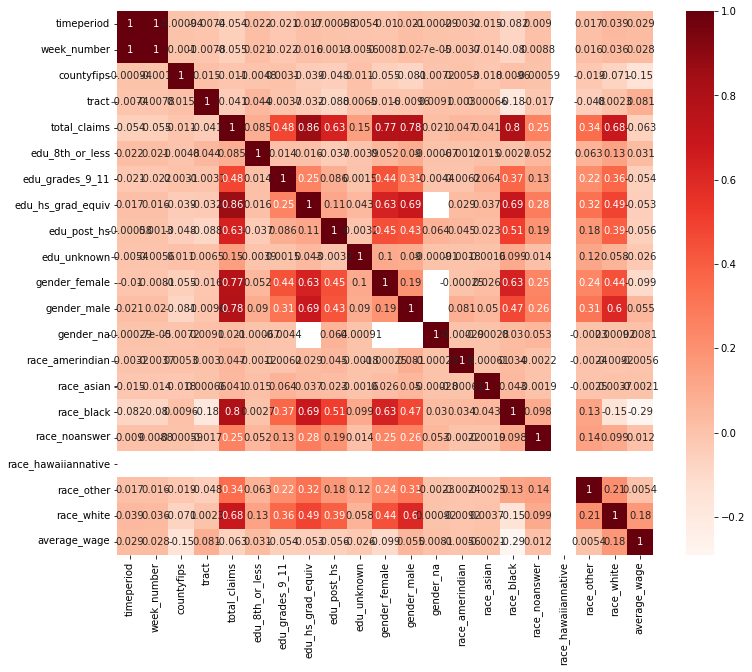

In [104]:
plt.figure(figsize=(12,10))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/4110863020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


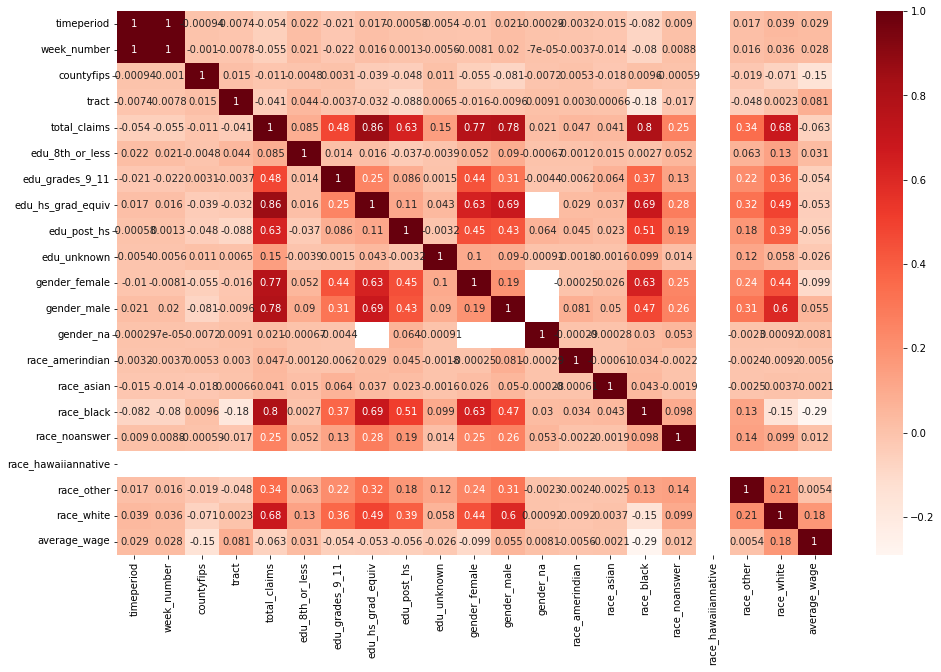

In [105]:
plt.figure(figsize=(16,10))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [106]:
udf.replace(np.nan, 0)

Unnamed: 0                             uu_id  timeperiod  week_number  \
0               0  f013068de98db1470bd986137a0c6d23    20220416           16   
1               1  21957d5517323845818d87623589e1ba    20220319           12   
2               2  6a5609f385912113b6f1014b958ed748    20220326           13   
3               3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29   
4               4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15   
...           ...                               ...         ...          ...   
16828       16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25   
16829       16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35   
16830       16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35   
16831       16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13   
16832       16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16   

       countyfips  tract                                        tract_name  \
0           18003    900             Census Tract 9, Allen County, Indiana   
1           18089  10400            Census Tract 104, Lake County, Indiana   
2           18089  11500            Census Tract 115, Lake County, Indiana   
3           18089  20700            Census Tract 207, Lake County, Indiana   
4           18089  21900            Census Tract 219, Lake County, Indiana   
...           ...    ...                                               ...   
16828       18163   3804   Census Tract 38.04, Vanderburgh County, Indiana   
16829       18163   3804   Census Tract 38.04, Vanderburgh County, Indiana   
16830       18163   3804   Census Tract 38.04, Vanderburgh County, Indiana   
16831       18163  10203  Census Tract 102.03, Vanderburgh County, Indiana   
16832       18163  10203  Census Tract 102.03, Vanderburgh County, Indiana   

       total_claims  edu_8th_or_less  edu_grades_9_11  ...  gender_female  \
0                22              0.0              0.0  ...            0.0   
1               111              0.0              0.0  ...           76.0   
2                39              0.0              0.0  ...            0.0   
3                14              0.0              0.0  ...            0.0   
4               155              0.0              0.0  ...           90.0   
...             ...              ...              ...  ...            ...   
16828            21              0.0              0.0  ...            0.0   
16829            22              0.0              0.0  ...            0.0   
16830            22              0.0              0.0  ...            0.0   
16831            53              0.0              0.0  ...            0.0   
16832            24              0.0              0.0  ...           11.0   

       gender_male  gender_na race_amerindian race_asian race_black  \
0              0.0        0.0             0.0        0.0       11.0   
1             35.0        0.0             0.0        0.0        0.0   
2              0.0        0.0             0.0        0.0       39.0   
3              0.0        0.0             0.0        0.0       10.0   
4             65.0        0.0             0.0        0.0      135.0   
...            ...        ...             ...        ...        ...   
16828          0.0        0.0             0.0        0.0        0.0   
16829          0.0        0.0             0.0        0.0        0.0   
16830          0.0        0.0             0.0        0.0        0.0   
16831          0.0        0.0             0.0        0.0        0.0   
16832         13.0        0.0             0.0        0.0        0.0   

       race_noanswer  race_hawaiiannative  race_other  race_white  
0                0.0                  0.0         0.0         0.0  
1                0.0                  0.0         0.0         0.0  
2                0.0                  0.0         0.0         0.0  
3                0.0                  0.0         0.0      

In [107]:
udf.replace(np.nan, 0)
udf.drop("Unnamed: 0",axis = 1)

uu_id  timeperiod  week_number  countyfips  \
0      f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1      21957d5517323845818d87623589e1ba    20220319           12       18089   
2      6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3      46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4      37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   
...                                 ...         ...          ...         ...   
16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25       18163   
16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13       18163   
16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16       18163   

       tract                                        tract_name  total_claims  \
0        900             Census Tract 9, Allen County, Indiana            22   
1      10400            Census Tract 104, Lake County, Indiana           111   
2      11500            Census Tract 115, Lake County, Indiana            39   
3      20700            Census Tract 207, Lake County, Indiana            14   
4      21900            Census Tract 219, Lake County, Indiana           155   
...      ...                                               ...           ...   
16828   3804   Census Tract 38.04, Vanderburgh County, Indiana            21   
16829   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16830   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16831  10203  Census Tract 102.03, Vanderburgh County, Indiana            53   
16832  10203  Census Tract 102.03, Vanderburgh County, Indiana            24   

       edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  \
0                  0.0              NaN               14.0  ...   
1                  0.0              NaN              108.0  ...   
2                  0.0              NaN                NaN  ...   
3                  0.0              NaN                NaN  ...   
4                  0.0              NaN               69.0  ...   
...                ...              ...                ...  ...   
16828              0.0              NaN                NaN  ...   
16829              0.0              NaN               13.0  ...   
16830              0.0              NaN               13.0  ...   
16831              0.0              NaN               48.0  ...   
16832              0.0              NaN               18.0  ...   

       gender_female  gender_male gender_na race_amerindian race_asian  \
0                NaN          NaN       0.0             0.0        0.0   
1               76.0         35.0       0.0             0.0        0.0   
2                NaN          NaN       0.0             0.0        0.0   
3                NaN          NaN       0.0             0.0        NaN   
4               90.0         65.0       0.0             0.0        0.0   
...              ...          ...       ...             ...        ...   
16828            NaN          NaN       0.0             0.0        0.0   
16829            NaN          NaN       0.0             0.0        0.0   
16830            NaN          NaN       0.0             0.0        0.0   
16831            NaN          NaN       0.0             0.0        0.0   
16832           11.0         13.0       0.0             0.0        NaN   

       race_black  race_noanswer  race_hawaiiannative  race_other  race_white  
0            11.0            0.0                  0.0         NaN         NaN  
1             NaN            NaN                  0.0         0.0         0.0  
2            39.0            0.0                  0.0         0.0         0.0  
3            10.0            0.0                  0.0         NaN         NaN  
4           135.0 

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/2158584522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = udf.corr()


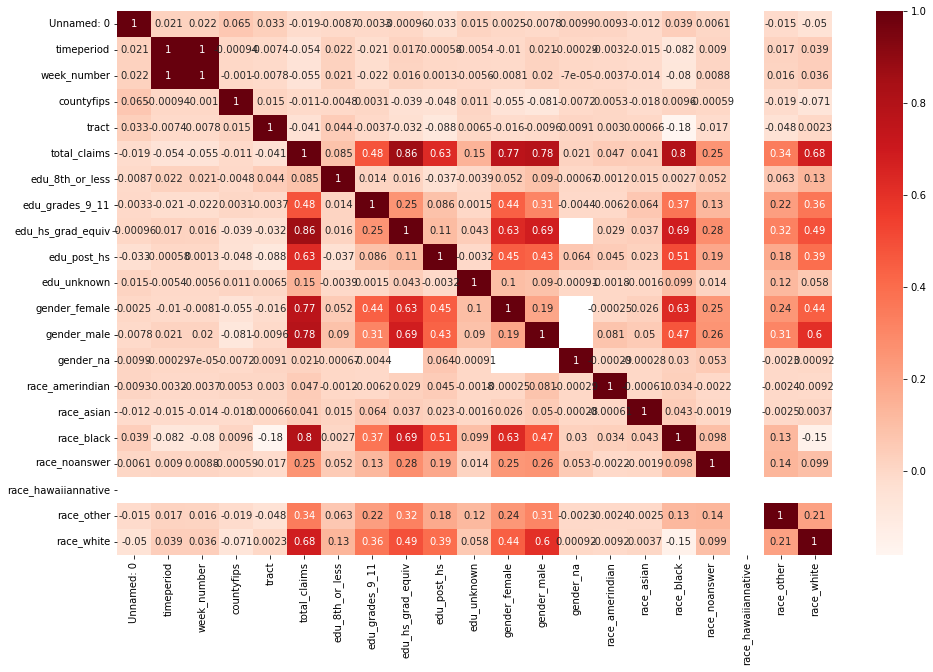

In [108]:
plt.figure(figsize=(16,10))
cor = udf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [109]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
# Mdf.to_csv("mixed.csv")
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")
mdf = pd.read_csv("mixed.csv")

mdf.replace(np.nan, 0)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/4110863020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


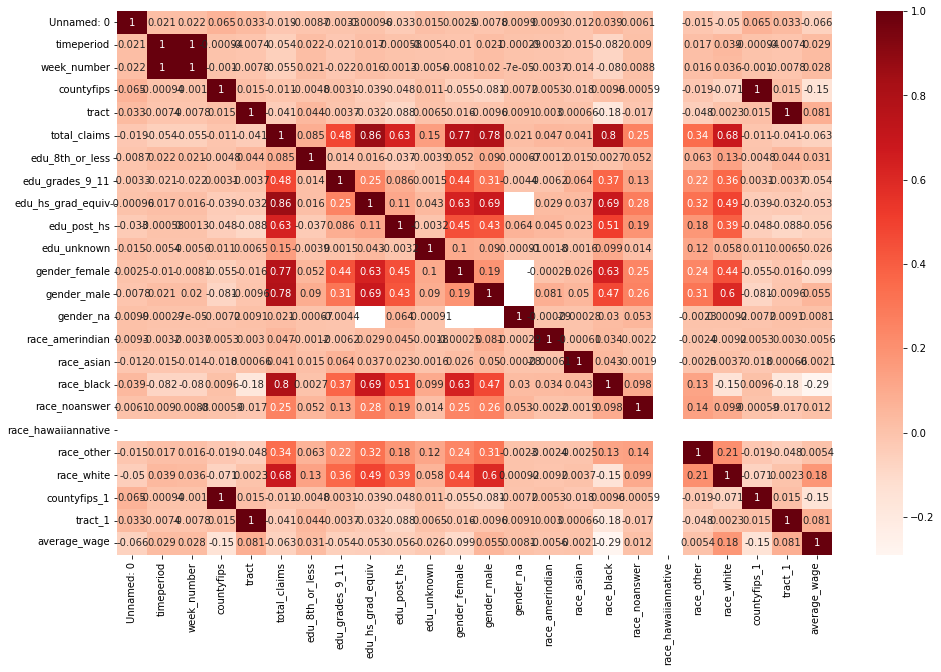

In [110]:
plt.figure(figsize=(16,10))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/2158584522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = udf.corr()


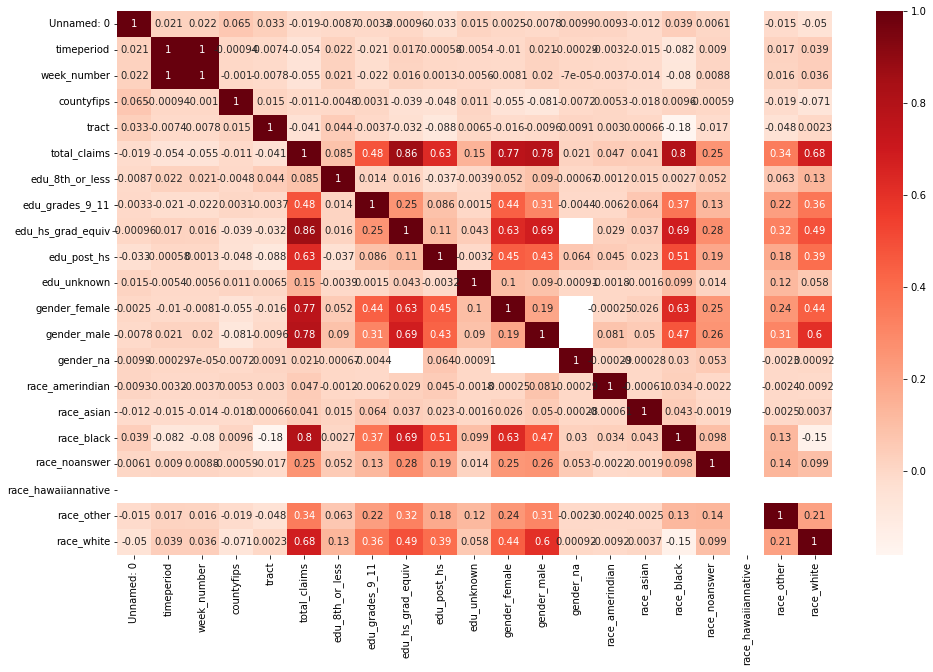

In [111]:
plt.figure(figsize=(16,10))
cor = udf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [112]:
# udf.replace(np.nan, 0)
udf = udf.drop("Unnamed: 0",axis = 1)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/2158584522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = udf.corr()


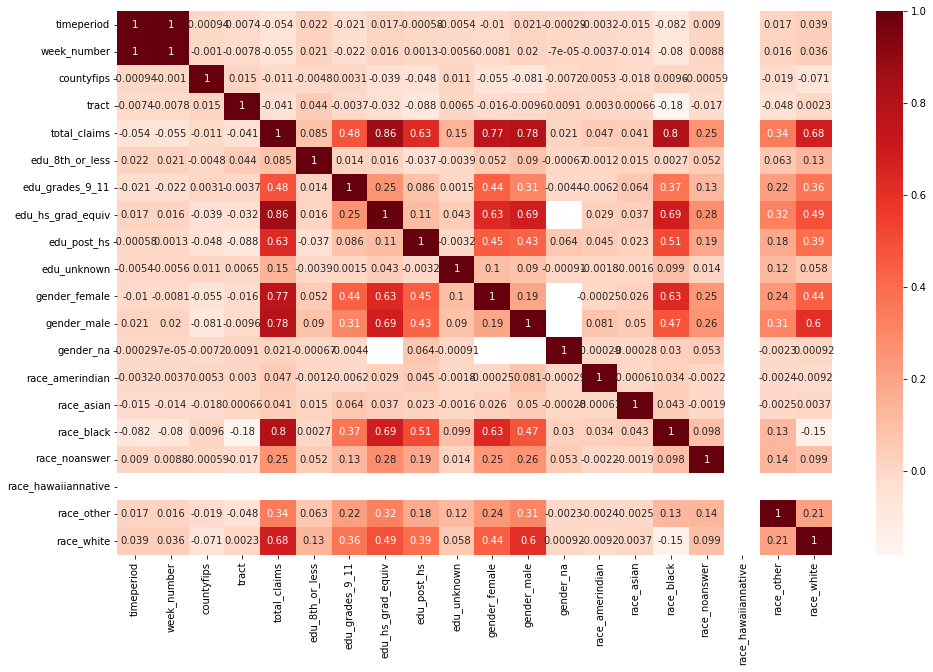

In [113]:
plt.figure(figsize=(16,10))
cor = udf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [114]:
mdf.replace(np.nan, 0)

Unnamed: 0                             uu_id  timeperiod  week_number  \
0               0  f013068de98db1470bd986137a0c6d23    20220416           16   
1               1  21957d5517323845818d87623589e1ba    20220319           12   
2               2  6a5609f385912113b6f1014b958ed748    20220326           13   
3               3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29   
4               4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15   
...           ...                               ...         ...          ...   
16828       16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25   
16829       16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35   
16830       16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35   
16831       16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13   
16832       16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16   

       countyfips  tract                                        tract_name  \
0           18003    900             Census Tract 9, Allen County, Indiana   
1           18089  10400            Census Tract 104, Lake County, Indiana   
2           18089  11500            Census Tract 115, Lake County, Indiana   
3           18089  20700            Census Tract 207, Lake County, Indiana   
4           18089  21900            Census Tract 219, Lake County, Indiana   
...           ...    ...                                               ...   
16828       18163   3804   Census Tract 38.04, Vanderburgh County, Indiana   
16829       18163   3804   Census Tract 38.04, Vanderburgh County, Indiana   
16830       18163   3804   Census Tract 38.04, Vanderburgh County, Indiana   
16831       18163  10203  Census Tract 102.03, Vanderburgh County, Indiana   
16832       18163  10203  Census Tract 102.03, Vanderburgh County, Indiana   

       total_claims  edu_8th_or_less  edu_grades_9_11  ...  race_black  \
0                22              0.0              0.0  ...        11.0   
1               111              0.0              0.0  ...         0.0   
2                39              0.0              0.0  ...        39.0   
3                14              0.0              0.0  ...        10.0   
4               155              0.0              0.0  ...       135.0   
...             ...              ...              ...  ...         ...   
16828            21              0.0              0.0  ...         0.0   
16829            22              0.0              0.0  ...         0.0   
16830            22              0.0              0.0  ...         0.0   
16831            53              0.0              0.0  ...         0.0   
16832            24              0.0              0.0  ...         0.0   

       race_noanswer  race_hawaiiannative race_other race_white  \
0                0.0                  0.0        0.0        0.0   
1                0.0                  0.0        0.0        0.0   
2                0.0                  0.0        0.0        0.0   
3                0.0                  0.0        0.0        0.0   
4                0.0                  0.0        0.0        0.0   
...              ...                  ...        ...        ...   
16828            0.0                  0.0        0.0       14.0   
16829            0.0                  0.0        0.0        0.0   
16830            0.0                  0.0        0.0        0.0   
16831            0.0                  0.0        0.0        0.0   
16832            0.0                  0.0        0.0        0.0   

                                uu_id_1  countyfips_1  tract_1  \
0      f013068de98db1470bd986137a0c6d23         18003      900   
1      21957d5517323845818d87623589e1ba         18089    10400   
2      6a5609f385912113b6f1014b958ed748         18089    11500   
3      46b2882ec4c373527ec33f7bd4f1388d         18089    20700   
4      37495d17e82f7df326bfc2c4c090f7b7         18089    21900   
...                

In [115]:
print(dict(mdf.head(1)))

{'Unnamed: 0': 0    0
Name: Unnamed: 0, dtype: int64, 'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0   NaN
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer

In [116]:
mdf = mdf.drop(['Unnamed: 0', 'uu_id_1','countyfips_1', 'tract_1', 'tract_name_1'], axis=1)

In [117]:
mdf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0              0.0              NaN               14.0  ...          NaN   
1              0.0              NaN              108.0  ...         35.0   
2              0.0              NaN                NaN  ...          NaN   
3              0.0              NaN                NaN  ...          NaN   
4              0.0              NaN               69.0  ...         65.0   

   gender_na race_amerindian race_asian race_black  race_noanswer  \
0        0.0             0.0        0.0       11.0            0.0   
1        0.0             0.0        0.0        NaN            NaN   
2        0.0             0.0        0.0       39.0            0.0   
3        0.0             0.0        NaN       10.0            0.0   
4        0.0             0.0        0.0      135.0            NaN   

   race_hawaiiannative  race_other  race_white  average_wage  
0                  0.0         NaN         NaN   8347.125000  
1                  0.0         0.0         0.0   7036.636364  
2                  0.0         0.0         0.0   7890.142857  
3                  0.0         NaN         NaN   7534.375000  
4                  NaN         NaN         NaN  11825.125000  

[5 rows x 26 columns]

In [118]:
mdf.replace(np.nan, 0)

uu_id  timeperiod  week_number  countyfips  \
0      f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1      21957d5517323845818d87623589e1ba    20220319           12       18089   
2      6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3      46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4      37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   
...                                 ...         ...          ...         ...   
16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25       18163   
16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13       18163   
16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16       18163   

       tract                                        tract_name  total_claims  \
0        900             Census Tract 9, Allen County, Indiana            22   
1      10400            Census Tract 104, Lake County, Indiana           111   
2      11500            Census Tract 115, Lake County, Indiana            39   
3      20700            Census Tract 207, Lake County, Indiana            14   
4      21900            Census Tract 219, Lake County, Indiana           155   
...      ...                                               ...           ...   
16828   3804   Census Tract 38.04, Vanderburgh County, Indiana            21   
16829   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16830   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16831  10203  Census Tract 102.03, Vanderburgh County, Indiana            53   
16832  10203  Census Tract 102.03, Vanderburgh County, Indiana            24   

       edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0                  0.0              0.0               14.0  ...          0.0   
1                  0.0              0.0              108.0  ...         35.0   
2                  0.0              0.0                0.0  ...          0.0   
3                  0.0              0.0                0.0  ...          0.0   
4                  0.0              0.0               69.0  ...         65.0   
...                ...              ...                ...  ...          ...   
16828              0.0              0.0                0.0  ...          0.0   
16829              0.0              0.0               13.0  ...          0.0   
16830              0.0              0.0               13.0  ...          0.0   
16831              0.0              0.0               48.0  ...          0.0   
16832              0.0              0.0               18.0  ...         13.0   

       gender_na race_amerindian race_asian race_black  race_noanswer  \
0            0.0             0.0        0.0       11.0            0.0   
1            0.0             0.0        0.0        0.0            0.0   
2            0.0             0.0        0.0       39.0            0.0   
3            0.0             0.0        0.0       10.0            0.0   
4            0.0             0.0        0.0      135.0            0.0   
...          ...             ...        ...        ...            ...   
16828        0.0             0.0        0.0        0.0            0.0   
16829        0.0             0.0        0.0        0.0            0.0   
16830        0.0             0.0        0.0        0.0            0.0   
16831        0.0             0.0        0.0        0.0            0.0   
16832        0.0             0.0        0.0        0.0            0.0   

       race_hawaiiannative  race_other  race_white  average_wage  
0                      0.0         0.0         0.0   8347.125000  
1                      0.0         0.0         0.0   7036.636364  
2                      0.0         0.0         0.0   7890.142857  
3     

In [119]:
print(dict(mdf.head(1)))

{'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0   NaN
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer3': 0    62
Name: top_category_employer3, dtype: obje

In [120]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/4110863020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


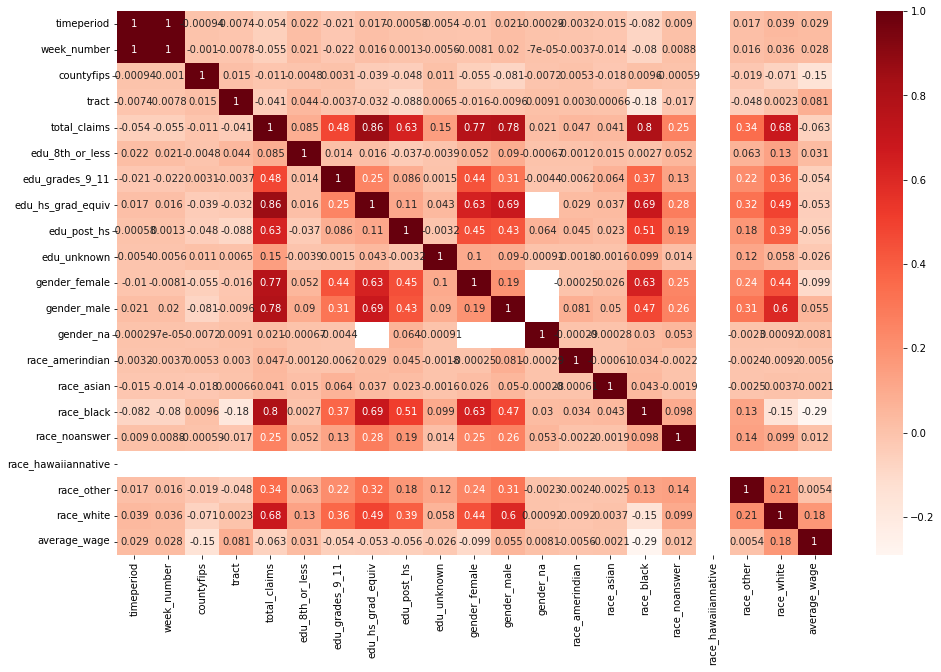

In [121]:
plt.figure(figsize=(16,10))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [122]:
mdf.value_counts()

uu_id                             timeperiod  week_number  countyfips  tract   tract_name                                       total_claims  edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  edu_post_hs  edu_unknown  top_category_employer1  top_category_employer2  top_category_employer3  gender_female  gender_male  gender_na  race_amerindian  race_asian  race_black  race_noanswer  race_hawaiiannative  race_other  race_white  average_wage
0ad94f09274e2c9cb0ef5cb77eb334b4  20220903    36           18097       380100  Census Tract 3801, Marion County, Indiana        73            0.0              11.0             42.0               20.0         0.0          56                      62                      23                      55.0           18.0         0.0        0.0              0.0         17.0        0.0            0.0                  0.0         56.0        13343.217391    2
def0c3fa02633394cd2b5041de7710ac  20220903    36           18109       510500  Census Tract 5105, Morga

In [123]:
mdf.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')

In [124]:
mdf.columns.type

AttributeError: 'Index' object has no attribute 'type'

In [125]:
mdf.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')

In [126]:
mdf.dtypes

uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
tract_name                 object
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
average_wage              float64
dtype: object

In [127]:
mdf["tract_name"]

0                   Census Tract 9, Allen County, Indiana
1                  Census Tract 104, Lake County, Indiana
2                  Census Tract 115, Lake County, Indiana
3                  Census Tract 207, Lake County, Indiana
4                  Census Tract 219, Lake County, Indiana
                               ...                       
16828     Census Tract 38.04, Vanderburgh County, Indiana
16829     Census Tract 38.04, Vanderburgh County, Indiana
16830     Census Tract 38.04, Vanderburgh County, Indiana
16831    Census Tract 102.03, Vanderburgh County, Indiana
16832    Census Tract 102.03, Vanderburgh County, Indiana
Name: tract_name, Length: 16833, dtype: object

In [128]:
mdf["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]

KeyError: ('top_category_employer1', 'top_category_employer2', 'top_category_employer3')

In [129]:
mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]]

top_category_employer1 top_category_employer2 top_category_employer3
0                      31-33                     51                     62
1                      48-49                     51                     56
2                         56                    NaN                    NaN
3                         56                     51                  44-45
4                         72                     51                     56
...                      ...                    ...                    ...
16828                     56                  48-49                     81
16829                     56                  48-49                     23
16830                     56                  48-49                     23
16831                     23                  48-49                  44-45
16832                     23                  48-49                  44-45

[16833 rows x 3 columns]

mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]]

In [130]:
mdf["top_category_employer1"].nunique()

21

mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]]

In [131]:
mdf["top_category_employer1"].unique()

array(['31-33', '48-49', '56', '72', '23', '54', '61', '11', '62',
       '44-45', '81', '52', '42', '71', '92', '51', '53', '55', '21',
       '99', '22'], dtype=object)

In [132]:
mdf["top_category_employer2"].unique()

array(['51', nan, '22', '11', '21', '99', '23', '42', '52', '53', '54',
       '55', '56', '61', '62', '71', '72', '81', '92', '31-33', '44-45',
       '48-49'], dtype=object)

In [133]:
mdf["top_category_employer3"].unique()

array(['62', '56', nan, '44-45', '31-33', '72', '48-49', '23', '52', '92',
       '42', '81', '54', '71', '55', '21', '99', '61', '51', '53', '22',
       '11'], dtype=object)

In [134]:
mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]].replace('31-33', "32")
mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]].replace('48-49', "48")
mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]].replace('44-45', "44")

top_category_employer1 top_category_employer2 top_category_employer3
0                      31-33                     51                     62
1                      48-49                     51                     56
2                         56                    NaN                    NaN
3                         56                     51                     44
4                         72                     51                     56
...                      ...                    ...                    ...
16828                     56                  48-49                     81
16829                     56                  48-49                     23
16830                     56                  48-49                     23
16831                     23                  48-49                     44
16832                     23                  48-49                     44

[16833 rows x 3 columns]

In [135]:
mdf["top_category_employer1"].unique()

array(['31-33', '48-49', '56', '72', '23', '54', '61', '11', '62',
       '44-45', '81', '52', '42', '71', '92', '51', '53', '55', '21',
       '99', '22'], dtype=object)

In [136]:
mdf = mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]].replace('31-33', "32")
mdf = mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]].replace('48-49', "48")
mdf = mdf[["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]].replace('44-45', "44")

In [137]:
mdf["top_category_employer1"].unique()

array(['32', '48', '56', '72', '23', '54', '61', '11', '62', '44', '81',
       '52', '42', '71', '92', '51', '53', '55', '21', '99', '22'],
      dtype=object)

In [138]:
mdf["top_category_employer2"].unique()

array(['51', nan, '22', '11', '21', '99', '23', '42', '52', '53', '54',
       '55', '56', '61', '62', '71', '72', '81', '92', '32', '44', '48'],
      dtype=object)

In [139]:
mdf["top_category_employer3"].unique()

array(['62', '56', nan, '44', '32', '72', '48', '23', '52', '92', '42',
       '81', '54', '71', '55', '21', '99', '61', '51', '53', '22', '11'],
      dtype=object)

In [140]:
mdf["tract_name"]

KeyError: 'tract_name'

In [141]:
mdf.head()

top_category_employer1 top_category_employer2 top_category_employer3
0                     32                     51                     62
1                     48                     51                     56
2                     56                    NaN                    NaN
3                     56                     51                     44
4                     72                     51                     56

In [142]:
# wdf.to_csv("wage.csv")
# udf.to_csv("unemploy.csv")
# Mdf.to_csv("mixed.csv")
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")
mdf = pd.read_csv("mixed.csv")

In [143]:
wdf.columns
# udf.nunique()

Index(['Unnamed: 0', 'uu_id', 'countyfips', 'tract', 'tract_name',
       'average_wage'],
      dtype='object')

In [144]:
len(udf.columns)

26

In [145]:
mdf.columns

Index(['Unnamed: 0', 'uu_id', 'timeperiod', 'week_number', 'countyfips',
       'tract', 'tract_name', 'total_claims', 'edu_8th_or_less',
       'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'uu_id_1',
       'countyfips_1', 'tract_1', 'tract_name_1', 'average_wage'],
      dtype='object')

In [146]:
print(dict(mdf.head(1)))

{'Unnamed: 0': 0    0
Name: Unnamed: 0, dtype: int64, 'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0   NaN
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer

In [147]:
mdf.head()

Unnamed: 0                             uu_id  timeperiod  week_number  \
0           0  f013068de98db1470bd986137a0c6d23    20220416           16   
1           1  21957d5517323845818d87623589e1ba    20220319           12   
2           2  6a5609f385912113b6f1014b958ed748    20220326           13   
3           3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29   
4           4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15   

   countyfips  tract                              tract_name  total_claims  \
0       18003    900   Census Tract 9, Allen County, Indiana            22   
1       18089  10400  Census Tract 104, Lake County, Indiana           111   
2       18089  11500  Census Tract 115, Lake County, Indiana            39   
3       18089  20700  Census Tract 207, Lake County, Indiana            14   
4       18089  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  ...  race_black  race_noanswer  \
0              0.0              NaN  ...        11.0            0.0   
1              0.0              NaN  ...         NaN            NaN   
2              0.0              NaN  ...        39.0            0.0   
3              0.0              NaN  ...        10.0            0.0   
4              0.0              NaN  ...       135.0            NaN   

   race_hawaiiannative race_other race_white  \
0                  0.0        NaN        NaN   
1                  0.0        0.0        0.0   
2                  0.0        0.0        0.0   
3                  0.0        NaN        NaN   
4                  NaN        NaN        NaN   

                            uu_id_1  countyfips_1  tract_1  \
0  f013068de98db1470bd986137a0c6d23         18003      900   
1  21957d5517323845818d87623589e1ba         18089    10400   
2  6a5609f385912113b6f1014b958ed748         18089    11500   
3  46b2882ec4c373527ec33f7bd4f1388d         18089    20700   
4  37495d17e82f7df326bfc2c4c090f7b7         18089    21900   

                             tract_name_1  average_wage  
0   Census Tract 9, Allen County, Indiana   8347.125000  
1  Census Tract 104, Lake County, Indiana   7036.636364  
2  Census Tract 115, Lake County, Indiana   7890.142857  
3  Census Tract 207, Lake County, Indiana   7534.375000  
4  Census Tract 219, Lake County, Indiana  11825.125000  

[5 rows x 31 columns]

In [148]:
mdf = mdf.drop(['Unnamed: 0', 'uu_id_1','countyfips_1', 'tract_1', 'tract_name_1'], axis=1)

In [149]:
mdf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0              0.0              NaN               14.0  ...          NaN   
1              0.0              NaN              108.0  ...         35.0   
2              0.0              NaN                NaN  ...          NaN   
3              0.0              NaN                NaN  ...          NaN   
4              0.0              NaN               69.0  ...         65.0   

   gender_na race_amerindian race_asian race_black  race_noanswer  \
0        0.0             0.0        0.0       11.0            0.0   
1        0.0             0.0        0.0        NaN            NaN   
2        0.0             0.0        0.0       39.0            0.0   
3        0.0             0.0        NaN       10.0            0.0   
4        0.0             0.0        0.0      135.0            NaN   

   race_hawaiiannative  race_other  race_white  average_wage  
0                  0.0         NaN         NaN   8347.125000  
1                  0.0         0.0         0.0   7036.636364  
2                  0.0         0.0         0.0   7890.142857  
3                  0.0         NaN         NaN   7534.375000  
4                  NaN         NaN         NaN  11825.125000  

[5 rows x 26 columns]

In [150]:
mdf.replace(np.nan, 0)

uu_id  timeperiod  week_number  countyfips  \
0      f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1      21957d5517323845818d87623589e1ba    20220319           12       18089   
2      6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3      46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4      37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   
...                                 ...         ...          ...         ...   
16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25       18163   
16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13       18163   
16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16       18163   

       tract                                        tract_name  total_claims  \
0        900             Census Tract 9, Allen County, Indiana            22   
1      10400            Census Tract 104, Lake County, Indiana           111   
2      11500            Census Tract 115, Lake County, Indiana            39   
3      20700            Census Tract 207, Lake County, Indiana            14   
4      21900            Census Tract 219, Lake County, Indiana           155   
...      ...                                               ...           ...   
16828   3804   Census Tract 38.04, Vanderburgh County, Indiana            21   
16829   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16830   3804   Census Tract 38.04, Vanderburgh County, Indiana            22   
16831  10203  Census Tract 102.03, Vanderburgh County, Indiana            53   
16832  10203  Census Tract 102.03, Vanderburgh County, Indiana            24   

       edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0                  0.0              0.0               14.0  ...          0.0   
1                  0.0              0.0              108.0  ...         35.0   
2                  0.0              0.0                0.0  ...          0.0   
3                  0.0              0.0                0.0  ...          0.0   
4                  0.0              0.0               69.0  ...         65.0   
...                ...              ...                ...  ...          ...   
16828              0.0              0.0                0.0  ...          0.0   
16829              0.0              0.0               13.0  ...          0.0   
16830              0.0              0.0               13.0  ...          0.0   
16831              0.0              0.0               48.0  ...          0.0   
16832              0.0              0.0               18.0  ...         13.0   

       gender_na race_amerindian race_asian race_black  race_noanswer  \
0            0.0             0.0        0.0       11.0            0.0   
1            0.0             0.0        0.0        0.0            0.0   
2            0.0             0.0        0.0       39.0            0.0   
3            0.0             0.0        0.0       10.0            0.0   
4            0.0             0.0        0.0      135.0            0.0   
...          ...             ...        ...        ...            ...   
16828        0.0             0.0        0.0        0.0            0.0   
16829        0.0             0.0        0.0        0.0            0.0   
16830        0.0             0.0        0.0        0.0            0.0   
16831        0.0             0.0        0.0        0.0            0.0   
16832        0.0             0.0        0.0        0.0            0.0   

       race_hawaiiannative  race_other  race_white  average_wage  
0                      0.0         0.0         0.0   8347.125000  
1                      0.0         0.0         0.0   7036.636364  
2                      0.0         0.0         0.0   7890.142857  
3     

In [151]:
print(dict(mdf.head(1)))

{'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0   NaN
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0   NaN
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    31-33
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer3': 0    62
Name: top_category_employer3, dtype: obje

In [152]:
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf[emp_cols] = mdf[emp_cols].replace('31-33', "32")
mdf[emp_cols] = mdf[emp_cols].replace('48-49', "48")
mdf[emp_cols] = mdf[emp_cols].replace('44-45', "44")

In [153]:
mdf["top_category_employer1"].unique()

array(['32', '48', '56', '72', '23', '54', '61', '11', '62', '44', '81',
       '52', '42', '71', '92', '51', '53', '55', '21', '99', '22'],
      dtype=object)

In [154]:
mdf["top_category_employer2"].unique()

array(['51', nan, '22', '11', '21', '99', '23', '42', '52', '53', '54',
       '55', '56', '61', '62', '71', '72', '81', '92', '32', '44', '48'],
      dtype=object)

In [155]:
mdf["top_category_employer3"].unique()

array(['62', '56', nan, '44', '32', '72', '48', '23', '52', '92', '42',
       '81', '54', '71', '55', '21', '99', '61', '51', '53', '22', '11'],
      dtype=object)

In [156]:
mdf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0              0.0              NaN               14.0  ...          NaN   
1              0.0              NaN              108.0  ...         35.0   
2              0.0              NaN                NaN  ...          NaN   
3              0.0              NaN                NaN  ...          NaN   
4              0.0              NaN               69.0  ...         65.0   

   gender_na race_amerindian race_asian race_black  race_noanswer  \
0        0.0             0.0        0.0       11.0            0.0   
1        0.0             0.0        0.0        NaN            NaN   
2        0.0             0.0        0.0       39.0            0.0   
3        0.0             0.0        NaN       10.0            0.0   
4        0.0             0.0        0.0      135.0            NaN   

   race_hawaiiannative  race_other  race_white  average_wage  
0                  0.0         NaN         NaN   8347.125000  
1                  0.0         0.0         0.0   7036.636364  
2                  0.0         0.0         0.0   7890.142857  
3                  0.0         NaN         NaN   7534.375000  
4                  NaN         NaN         NaN  11825.125000  

[5 rows x 26 columns]

In [157]:
mdf = mdf.replace(np.nan, 0)

In [158]:
print(dict(mdf.head(1)))

{'uu_id': 0    f013068de98db1470bd986137a0c6d23
Name: uu_id, dtype: object, 'timeperiod': 0    20220416
Name: timeperiod, dtype: int64, 'week_number': 0    16
Name: week_number, dtype: int64, 'countyfips': 0    18003
Name: countyfips, dtype: int64, 'tract': 0    900
Name: tract, dtype: int64, 'tract_name': 0    Census Tract 9, Allen County, Indiana
Name: tract_name, dtype: object, 'total_claims': 0    22
Name: total_claims, dtype: int64, 'edu_8th_or_less': 0    0.0
Name: edu_8th_or_less, dtype: float64, 'edu_grades_9_11': 0    0.0
Name: edu_grades_9_11, dtype: float64, 'edu_hs_grad_equiv': 0    14.0
Name: edu_hs_grad_equiv, dtype: float64, 'edu_post_hs': 0    0.0
Name: edu_post_hs, dtype: float64, 'edu_unknown': 0    0.0
Name: edu_unknown, dtype: float64, 'top_category_employer1': 0    32
Name: top_category_employer1, dtype: object, 'top_category_employer2': 0    51
Name: top_category_employer2, dtype: object, 'top_category_employer3': 0    62
Name: top_category_employer3, dtype: objec

In [159]:
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf[emp_cols] = mdf[emp_cols].replace('31-33', "32")
mdf[emp_cols] = mdf[emp_cols].replace('48-49', "48")
mdf[emp_cols] = mdf[emp_cols].replace('44-45', "44")

In [160]:
mdf["top_category_employer1"].unique()

array(['32', '48', '56', '72', '23', '54', '61', '11', '62', '44', '81',
       '52', '42', '71', '92', '51', '53', '55', '21', '99', '22'],
      dtype=object)

In [161]:
mdf["top_category_employer2"].unique()

array(['51', 0, '22', '11', '21', '99', '23', '42', '52', '53', '54',
       '55', '56', '61', '62', '71', '72', '81', '92', '32', '44', '48'],
      dtype=object)

In [162]:
mdf["top_category_employer3"].unique()

array(['62', '56', 0, '44', '32', '72', '48', '23', '52', '92', '42',
       '81', '54', '71', '55', '21', '99', '61', '51', '53', '22', '11'],
      dtype=object)

In [163]:
mdf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0              0.0              0.0               14.0  ...          0.0   
1              0.0              0.0              108.0  ...         35.0   
2              0.0              0.0                0.0  ...          0.0   
3              0.0              0.0                0.0  ...          0.0   
4              0.0              0.0               69.0  ...         65.0   

   gender_na race_amerindian race_asian race_black  race_noanswer  \
0        0.0             0.0        0.0       11.0            0.0   
1        0.0             0.0        0.0        0.0            0.0   
2        0.0             0.0        0.0       39.0            0.0   
3        0.0             0.0        0.0       10.0            0.0   
4        0.0             0.0        0.0      135.0            0.0   

   race_hawaiiannative  race_other  race_white  average_wage  
0                  0.0         0.0         0.0   8347.125000  
1                  0.0         0.0         0.0   7036.636364  
2                  0.0         0.0         0.0   7890.142857  
3                  0.0         0.0         0.0   7534.375000  
4                  0.0         0.0         0.0  11825.125000  

[5 rows x 26 columns]

In [164]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/4110863020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


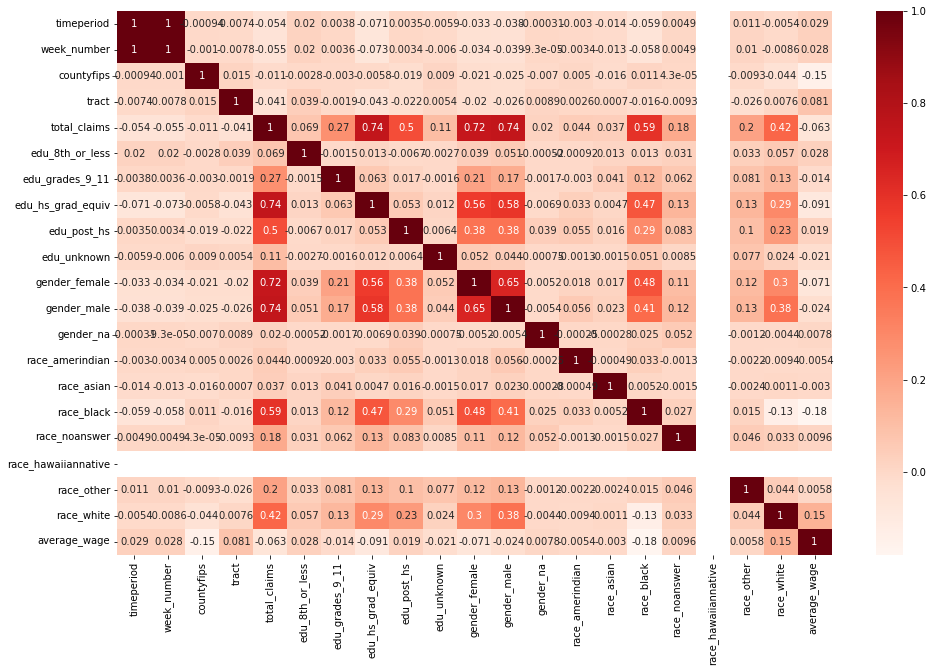

In [165]:
plt.figure(figsize=(16,10))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [166]:
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf[emp_cols] = mdf[emp_cols].replace('31-33', "32")
mdf[emp_cols] = mdf[emp_cols].replace('48-49', "48")
mdf[emp_cols] = mdf[emp_cols].replace('44-45', "44")

In [167]:
mdf[emp_cols] = pd.to_numeric(mdf[emp_cols])

TypeError: arg must be a list, tuple, 1-d array, or Series

In [168]:
mdf["top_category_employer1"].unique()

array(['32', '48', '56', '72', '23', '54', '61', '11', '62', '44', '81',
       '52', '42', '71', '92', '51', '53', '55', '21', '99', '22'],
      dtype=object)

In [169]:
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf[emp_cols] = mdf[emp_cols].replace('31-33', "32")
mdf[emp_cols] = mdf[emp_cols].replace('48-49', "48")
mdf[emp_cols] = mdf[emp_cols].replace('44-45', "44")

In [170]:
mdf[emp_cols] = pd.to_numeric(mdf["top_category_employer1"])

ValueError: Columns must be same length as key

In [171]:
mdf["top_category_employer1"].unique()

array(['32', '48', '56', '72', '23', '54', '61', '11', '62', '44', '81',
       '52', '42', '71', '92', '51', '53', '55', '21', '99', '22'],
      dtype=object)

In [172]:
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf[emp_cols] = mdf[emp_cols].replace('31-33', "32")
mdf[emp_cols] = mdf[emp_cols].replace('48-49', "48")
mdf[emp_cols] = mdf[emp_cols].replace('44-45', "44")

In [173]:
mdf["top_category_employer1"] = pd.to_numeric(mdf["top_category_employer1"])

In [174]:
mdf["top_category_employer1"].unique()

array([32, 48, 56, 72, 23, 54, 61, 11, 62, 44, 81, 52, 42, 71, 92, 51, 53,
       55, 21, 99, 22])

In [175]:
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf[emp_cols] = mdf[emp_cols].replace('31-33', "32")
mdf[emp_cols] = mdf[emp_cols].replace('48-49', "48")
mdf[emp_cols] = mdf[emp_cols].replace('44-45', "44")

In [176]:
mdf["top_category_employer1"] = pd.to_numeric(mdf["top_category_employer1"])
mdf["top_category_employer2"] = pd.to_numeric(mdf["top_category_employer2"])
mdf["top_category_employer3"] = pd.to_numeric(mdf["top_category_employer3"])

In [177]:
mdf["top_category_employer1"].unique()

array([32, 48, 56, 72, 23, 54, 61, 11, 62, 44, 81, 52, 42, 71, 92, 51, 53,
       55, 21, 99, 22])

In [178]:
mdf["top_category_employer2"].unique()

array([51,  0, 22, 11, 21, 99, 23, 42, 52, 53, 54, 55, 56, 61, 62, 71, 72,
       81, 92, 32, 44, 48])

In [179]:
mdf["top_category_employer3"].unique()

array([62, 56,  0, 44, 32, 72, 48, 23, 52, 92, 42, 81, 54, 71, 55, 21, 99,
       61, 51, 53, 22, 11])

In [180]:
mdf.head()

uu_id  timeperiod  week_number  countyfips  \
0  f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1  21957d5517323845818d87623589e1ba    20220319           12       18089   
2  6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3  46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4  37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   

   tract                              tract_name  total_claims  \
0    900   Census Tract 9, Allen County, Indiana            22   
1  10400  Census Tract 104, Lake County, Indiana           111   
2  11500  Census Tract 115, Lake County, Indiana            39   
3  20700  Census Tract 207, Lake County, Indiana            14   
4  21900  Census Tract 219, Lake County, Indiana           155   

   edu_8th_or_less  edu_grades_9_11  edu_hs_grad_equiv  ...  gender_male  \
0              0.0              0.0               14.0  ...          0.0   
1              0.0              0.0              108.0  ...         35.0   
2              0.0              0.0                0.0  ...          0.0   
3              0.0              0.0                0.0  ...          0.0   
4              0.0              0.0               69.0  ...         65.0   

   gender_na  race_amerindian  race_asian  race_black  race_noanswer  \
0        0.0              0.0         0.0        11.0            0.0   
1        0.0              0.0         0.0         0.0            0.0   
2        0.0              0.0         0.0        39.0            0.0   
3        0.0              0.0         0.0        10.0            0.0   
4        0.0              0.0         0.0       135.0            0.0   

   race_hawaiiannative  race_other  race_white  average_wage  
0                  0.0         0.0         0.0   8347.125000  
1                  0.0         0.0         0.0   7036.636364  
2                  0.0         0.0         0.0   7890.142857  
3                  0.0         0.0         0.0   7534.375000  
4                  0.0         0.0         0.0  11825.125000  

[5 rows x 26 columns]

In [181]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/4110863020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


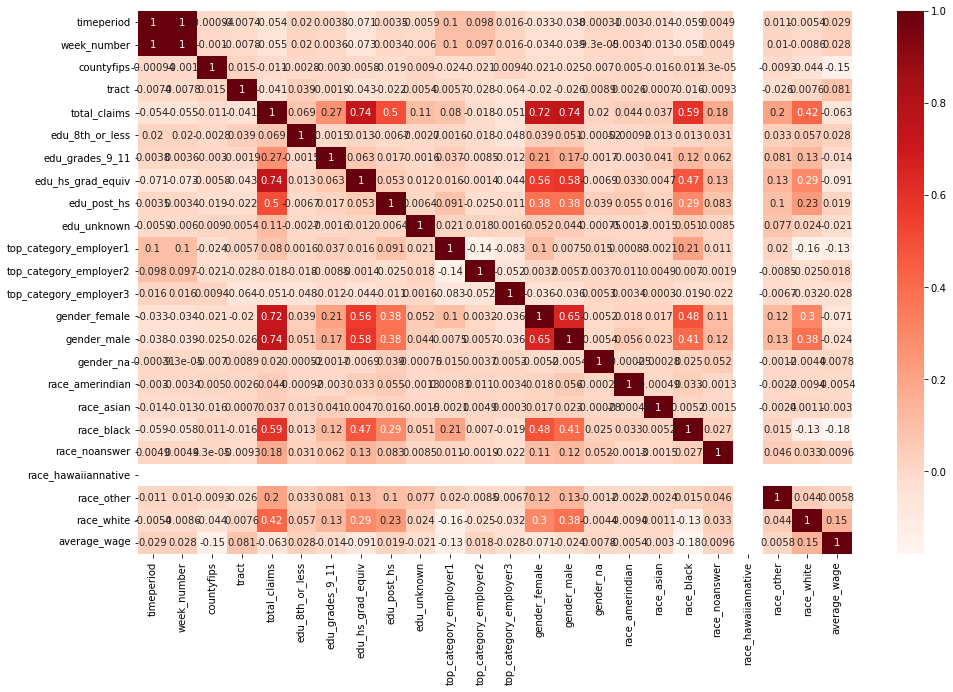

In [182]:
plt.figure(figsize=(16,10))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [183]:
len(pdf)

525

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/1839560826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


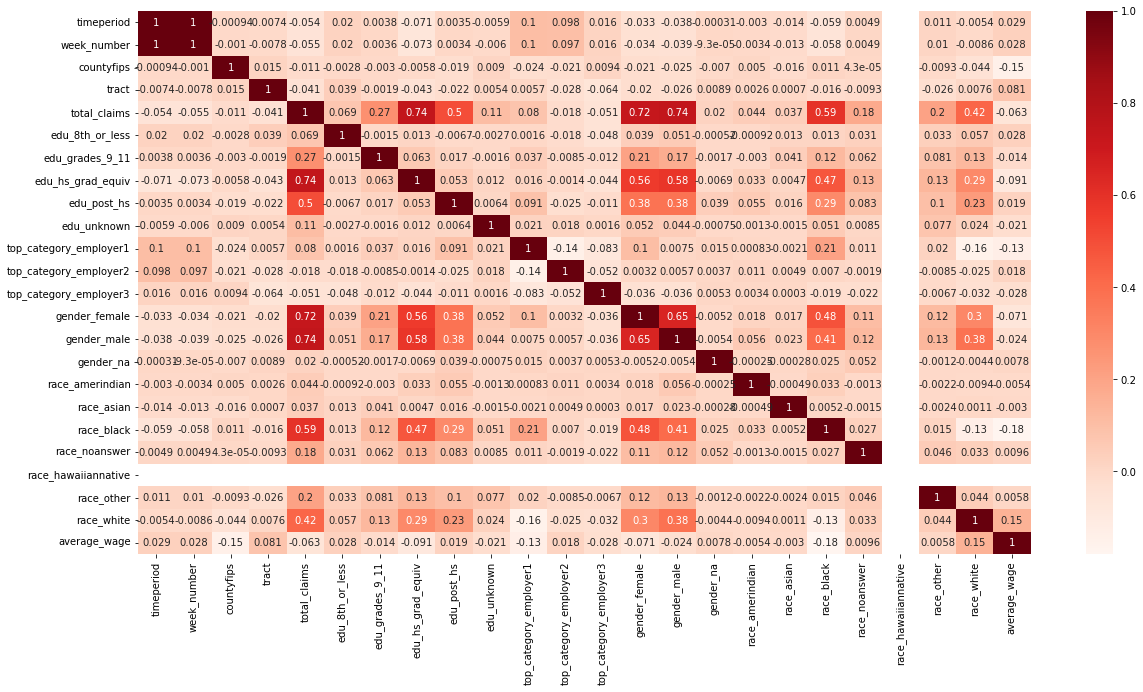

In [184]:
plt.figure(figsize=(20,10))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/2921799004.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = mdf.corr()


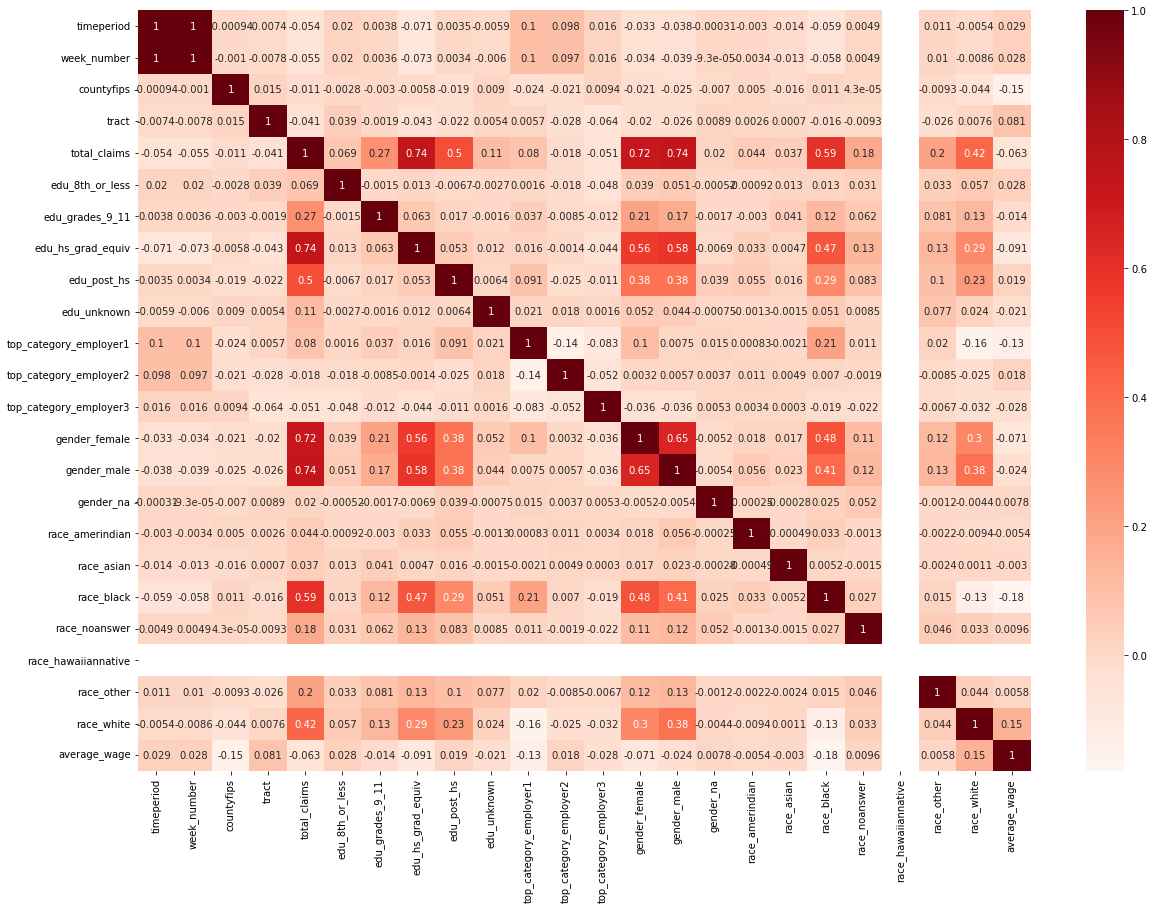

In [185]:
plt.figure(figsize=(20,14))
cor = mdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

plt.figure(figsize=(16,10))
cor = udf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [186]:
mdf.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')

In [187]:
f_df = mdf[["edu_hs_grad_equiv","edu_post_hs",'gender_female', 'gender_male', 'race_black', 'race_white','timeperiod', 'week_number']]

In [188]:
f_df

edu_hs_grad_equiv  edu_post_hs  gender_female  gender_male  race_black  \
0                   14.0          0.0            0.0          0.0        11.0   
1                  108.0          0.0           76.0         35.0         0.0   
2                    0.0          0.0            0.0          0.0        39.0   
3                    0.0          0.0            0.0          0.0        10.0   
4                   69.0         83.0           90.0         65.0       135.0   
...                  ...          ...            ...          ...         ...   
16828                0.0         12.0            0.0          0.0         0.0   
16829               13.0          0.0            0.0          0.0         0.0   
16830               13.0          0.0            0.0          0.0         0.0   
16831               48.0          0.0            0.0          0.0         0.0   
16832               18.0          0.0           11.0         13.0         0.0   

       race_white  timeperiod  week_number  
0             0.0    20220416           16  
1             0.0    20220319           12  
2             0.0    20220326           13  
3             0.0    20220716           29  
4             0.0    20220409           15  
...           ...         ...          ...  
16828        14.0    20220618           25  
16829         0.0    20220827           35  
16830         0.0    20220827           35  
16831         0.0    20220326           13  
16832         0.0    20220416           16  

[16833 rows x 8 columns]

In [189]:
f_df = mdf[["total_claims","edu_hs_grad_equiv","edu_post_hs",'gender_female', 'gender_male', 'race_black', 'race_white','timeperiod', 'week_number']]

In [190]:
f_df

total_claims  edu_hs_grad_equiv  edu_post_hs  gender_female  \
0                22               14.0          0.0            0.0   
1               111              108.0          0.0           76.0   
2                39                0.0          0.0            0.0   
3                14                0.0          0.0            0.0   
4               155               69.0         83.0           90.0   
...             ...                ...          ...            ...   
16828            21                0.0         12.0            0.0   
16829            22               13.0          0.0            0.0   
16830            22               13.0          0.0            0.0   
16831            53               48.0          0.0            0.0   
16832            24               18.0          0.0           11.0   

       gender_male  race_black  race_white  timeperiod  week_number  
0              0.0        11.0         0.0    20220416           16  
1             35.0         0.0         0.0    20220319           12  
2              0.0        39.0         0.0    20220326           13  
3              0.0        10.0         0.0    20220716           29  
4             65.0       135.0         0.0    20220409           15  
...            ...         ...         ...         ...          ...  
16828          0.0         0.0        14.0    20220618           25  
16829          0.0         0.0         0.0    20220827           35  
16830          0.0         0.0         0.0    20220827           35  
16831          0.0         0.0         0.0    20220326           13  
16832         13.0         0.0         0.0    20220416           16  

[16833 rows x 9 columns]

In [191]:
data = f_df.set_index('timeperiod')
data.index

Int64Index([20220416, 20220319, 20220326, 20220716, 20220409, 20220820,
            20220820, 20220129, 20220716, 20220611,
            ...
            20220618, 20220326, 20220430, 20220226, 20220423, 20220618,
            20220827, 20220827, 20220326, 20220416],
           dtype='int64', name='timeperiod', length=16833)

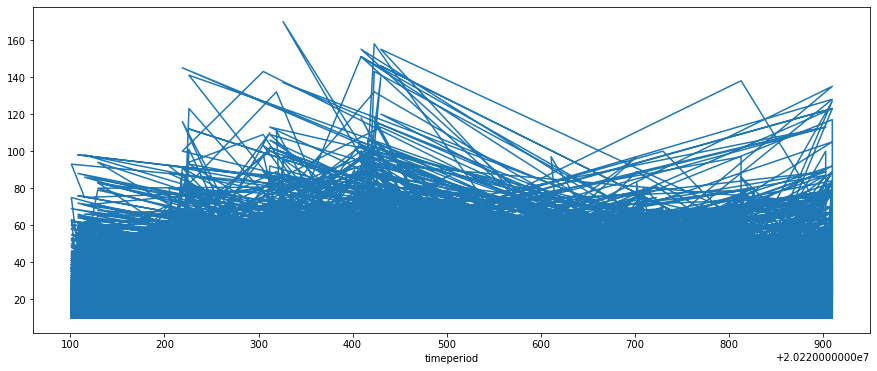

In [192]:
data["total_claims"].plot(figsize=(15, 6))
plt.show()

In [193]:
data = f_df.set_index('week_number')
data.index

Int64Index([16, 12, 13, 29, 15, 34, 34,  5, 29, 24,
            ...
            25, 13, 18,  9, 17, 25, 35, 35, 13, 16],
           dtype='int64', name='week_number', length=16833)

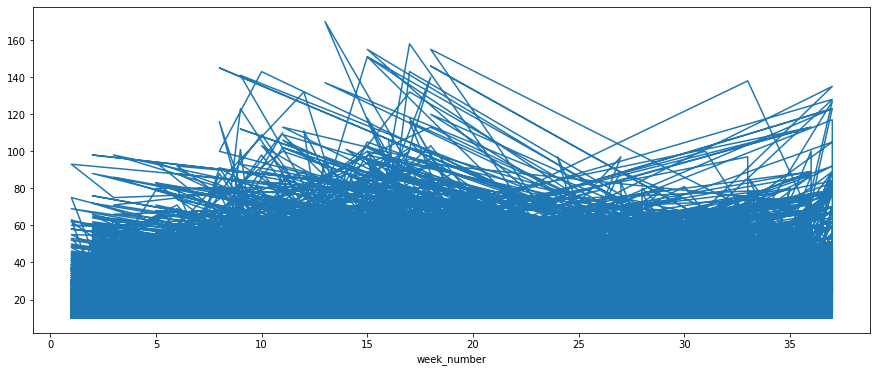

In [194]:
data["total_claims"].plot(figsize=(15, 6))
plt.show()

In [195]:
f_df["timeperiod"].nunique()

35

In [196]:
f_df["timeperiod"].nunique()/len(f_df)

0.002079249094041466

In [197]:
len(f_df)/f_df["timeperiod"].nunique()

480.9428571428571

In [198]:
f_df = mdf[["total_claims","edu_hs_grad_equiv","edu_post_hs",'gender_female', 'gender_male', 'race_black', 'race_white','timeperiod', 'week_number',"uu_id"]]

In [199]:
f_df.groupby(['Animal'])

KeyError: 'Animal'

In [200]:
f_df.groupby(['uu_id'])

In [201]:
f_df['uu_id']

0        f013068de98db1470bd986137a0c6d23
1        21957d5517323845818d87623589e1ba
2        6a5609f385912113b6f1014b958ed748
3        46b2882ec4c373527ec33f7bd4f1388d
4        37495d17e82f7df326bfc2c4c090f7b7
                       ...               
16828    f35320206f3dd1ffc411e4ac127caf92
16829    f35320206f3dd1ffc411e4ac127caf92
16830    f35320206f3dd1ffc411e4ac127caf92
16831    bbcb018f0e5e49e13636f6e78ce9f60f
16832    bbcb018f0e5e49e13636f6e78ce9f60f
Name: uu_id, Length: 16833, dtype: object

In [202]:
f_df['uu_id'].unique

<bound method Series.unique of 0        f013068de98db1470bd986137a0c6d23
1        21957d5517323845818d87623589e1ba
2        6a5609f385912113b6f1014b958ed748
3        46b2882ec4c373527ec33f7bd4f1388d
4        37495d17e82f7df326bfc2c4c090f7b7
                       ...               
16828    f35320206f3dd1ffc411e4ac127caf92
16829    f35320206f3dd1ffc411e4ac127caf92
16830    f35320206f3dd1ffc411e4ac127caf92
16831    bbcb018f0e5e49e13636f6e78ce9f60f
16832    bbcb018f0e5e49e13636f6e78ce9f60f
Name: uu_id, Length: 16833, dtype: object>

In [203]:
f_df['uu_id'].unique()

array(['f013068de98db1470bd986137a0c6d23',
       '21957d5517323845818d87623589e1ba',
       '6a5609f385912113b6f1014b958ed748',
       '46b2882ec4c373527ec33f7bd4f1388d',
       '37495d17e82f7df326bfc2c4c090f7b7',
       '25a57fe39e03c632125308737a7d3769',
       '45c8cf419dd4c4b442dbf3603ba94379',
       '8f782a6153268c6031e31784e2d4eae2',
       '5c04f20bd2f8552aa7ac210dc01292fb',
       '050a624d618a68e43fe31189909c644f',
       'bc7ebe1813e2b66f084289e1b1172f21',
       '6239669cbfe444abd0a46536a670d150',
       '6657c9871fa2f67cd168e6f94354060e',
       '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
       'e8f426c17a7172179be379cb926bd278',
       '3934b01a1e31d0a6af96867e1afbf03c',
       '5e9480dba0f8de932f4d9fb55fa6b8b1',
       '1bd2241076381b8c9e85d660512a013e',
       '196c37e49c98e0b8cdd142c001431a7a',
       '8ed377ac3767ffda176fcdea40bcd7e4',
       'c06321bd819be6f5c537c67a2797bd12',
       '06e492b4f29d153af26c659d1f7da2a1',
       '53405bf66812a9f2623a307de572c11e',
       'bf9

In [204]:
f_df['uu_id'].nunique()

525

In [205]:
f_df['uu_id'].unique()

array(['f013068de98db1470bd986137a0c6d23',
       '21957d5517323845818d87623589e1ba',
       '6a5609f385912113b6f1014b958ed748',
       '46b2882ec4c373527ec33f7bd4f1388d',
       '37495d17e82f7df326bfc2c4c090f7b7',
       '25a57fe39e03c632125308737a7d3769',
       '45c8cf419dd4c4b442dbf3603ba94379',
       '8f782a6153268c6031e31784e2d4eae2',
       '5c04f20bd2f8552aa7ac210dc01292fb',
       '050a624d618a68e43fe31189909c644f',
       'bc7ebe1813e2b66f084289e1b1172f21',
       '6239669cbfe444abd0a46536a670d150',
       '6657c9871fa2f67cd168e6f94354060e',
       '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
       'e8f426c17a7172179be379cb926bd278',
       '3934b01a1e31d0a6af96867e1afbf03c',
       '5e9480dba0f8de932f4d9fb55fa6b8b1',
       '1bd2241076381b8c9e85d660512a013e',
       '196c37e49c98e0b8cdd142c001431a7a',
       '8ed377ac3767ffda176fcdea40bcd7e4',
       'c06321bd819be6f5c537c67a2797bd12',
       '06e492b4f29d153af26c659d1f7da2a1',
       '53405bf66812a9f2623a307de572c11e',
       'bf9

In [206]:
f_df['uu_id'].nunique()

525

In [207]:
list(f_df['uu_id'].unique())

['f013068de98db1470bd986137a0c6d23',
 '21957d5517323845818d87623589e1ba',
 '6a5609f385912113b6f1014b958ed748',
 '46b2882ec4c373527ec33f7bd4f1388d',
 '37495d17e82f7df326bfc2c4c090f7b7',
 '25a57fe39e03c632125308737a7d3769',
 '45c8cf419dd4c4b442dbf3603ba94379',
 '8f782a6153268c6031e31784e2d4eae2',
 '5c04f20bd2f8552aa7ac210dc01292fb',
 '050a624d618a68e43fe31189909c644f',
 'bc7ebe1813e2b66f084289e1b1172f21',
 '6239669cbfe444abd0a46536a670d150',
 '6657c9871fa2f67cd168e6f94354060e',
 '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
 'e8f426c17a7172179be379cb926bd278',
 '3934b01a1e31d0a6af96867e1afbf03c',
 '5e9480dba0f8de932f4d9fb55fa6b8b1',
 '1bd2241076381b8c9e85d660512a013e',
 '196c37e49c98e0b8cdd142c001431a7a',
 '8ed377ac3767ffda176fcdea40bcd7e4',
 'c06321bd819be6f5c537c67a2797bd12',
 '06e492b4f29d153af26c659d1f7da2a1',
 '53405bf66812a9f2623a307de572c11e',
 'bf9e1cf78ce5a29fb59c7e634d596263',
 'f43fb9e90c5ecf879016b159aaa17fcb',
 'bd42c9bae54ed298a8281caf7b699ff6',
 'cfeb7a55105a6e277ebef7dc3df83ffc',
 

In [208]:
lst = list(f_df['uu_id'].unique())

In [209]:
data1 = f_df[f_df['uu_id'] = lst[0]]

SyntaxError: invalid syntax (3500432242.py, line 1)

In [210]:
f_df.set_index('week_number')
data.index

Int64Index([16, 12, 13, 29, 15, 34, 34,  5, 29, 24,
            ...
            25, 13, 18,  9, 17, 25, 35, 35, 13, 16],
           dtype='int64', name='week_number', length=16833)

In [211]:
data1 = f_df[[f_df['uu_id'] = lst[0]]]

SyntaxError: invalid syntax (1995415798.py, line 1)

In [212]:
f_df.set_index('week_number')
data.index

Int64Index([16, 12, 13, 29, 15, 34, 34,  5, 29, 24,
            ...
            25, 13, 18,  9, 17, 25, 35, 35, 13, 16],
           dtype='int64', name='week_number', length=16833)

In [213]:
data1 = f_df[[f_df['uu_id'] == lst[0]]]

KeyError: "None of [Index([(True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [columns]"

In [214]:
f_df.set_index('week_number')
data.index

Int64Index([16, 12, 13, 29, 15, 34, 34,  5, 29, 24,
            ...
            25, 13, 18,  9, 17, 25, 35, 35, 13, 16],
           dtype='int64', name='week_number', length=16833)

In [215]:
data1 = f_df[[f_df['uu_id'] == lst[0]]]

KeyError: "None of [Index([(True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [columns]"

In [216]:
data1 = data1.set_index('week_number')
data1.index

NameError: name 'data1' is not defined

In [217]:
data1 = f_df[f_df['uu_id'] == lst[0]]

In [218]:
data1 = data1.set_index('week_number')
data1.index

Int64Index([16,  7, 35, 11,  6, 10, 35,  1, 12,  5, 22, 15, 34,  3,  2, 33,  9,
            33, 34, 18, 21, 17, 20],
           dtype='int64', name='week_number')

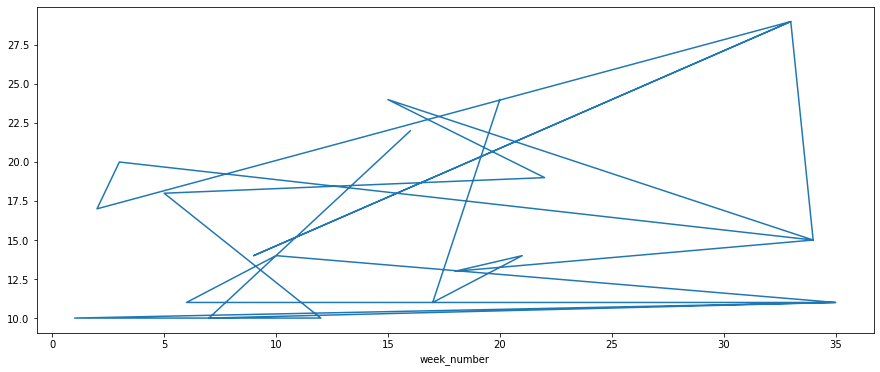

In [219]:
data1["total_claims"].plot(figsize=(15, 6))
plt.show()

In [220]:
data1 = f_df[f_df['uu_id'] == lst[0]]

In [221]:
data1 = data1.set_index('timeperiod')
data1.index

Int64Index([20220416, 20220212, 20220827, 20220312, 20220205, 20220305,
            20220827, 20220101, 20220319, 20220129, 20220528, 20220409,
            20220820, 20220115, 20220108, 20220813, 20220226, 20220813,
            20220820, 20220430, 20220521, 20220423, 20220514],
           dtype='int64', name='timeperiod')

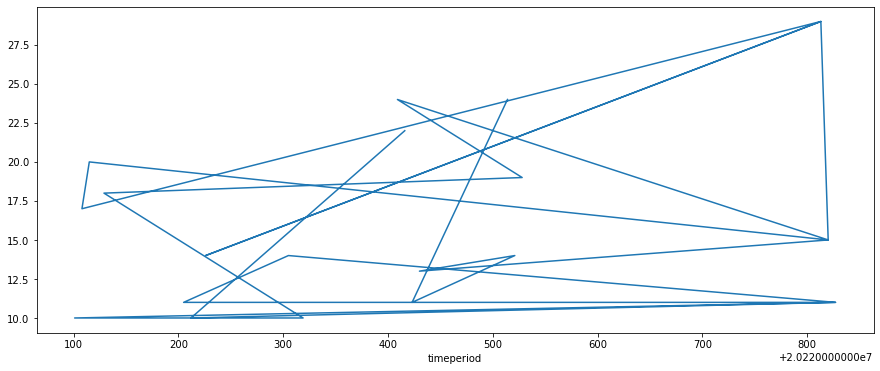

In [222]:
data1["total_claims"].plot(figsize=(15, 6))
plt.show()

In [223]:
data1 = f_df[f_df['uu_id'] == lst[0]]

In [224]:
data1 = data1.set_index('week_number')
data1.index

Int64Index([16,  7, 35, 11,  6, 10, 35,  1, 12,  5, 22, 15, 34,  3,  2, 33,  9,
            33, 34, 18, 21, 17, 20],
           dtype='int64', name='week_number')

In [225]:
lst = list(f_df['week_number'].unique())

In [226]:
lst = list(f_df['week_number'].unique())
len(lst)

35

In [227]:
f1_df = f_df.groupby(f_df['week_number']).mean()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/2884441341.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f1_df = f_df.groupby(f_df['week_number']).mean()


In [228]:
f1_df = f_df.groupby(['week_number']).mean()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/2688756060.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f1_df = f_df.groupby(['week_number']).mean()


In [229]:
f1_df = f_df.groupby(['week_number']).mean()
f1_df

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_3292/2224018422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f1_df = f_df.groupby(['week_number']).mean()


total_claims  edu_hs_grad_equiv  edu_post_hs  gender_female  \
week_number                                                                
1               22.329787           6.844681     2.736170       4.257447   
2               26.622490          10.299197     4.002008       7.475904   
3               24.195021           8.854772     3.286307       5.863071   
5               25.057692           9.002137     3.536325       5.886752   
6               22.951648           7.345055     3.265934       4.087912   
7               22.098876           7.083146     2.294382       3.782022   
8               24.723502           8.723502     2.905530       4.831797   
9               25.116667           9.376190     3.104762       4.759524   
10              24.054591           7.960298     2.823821       3.972705   
11              25.770000           9.607500     3.192500       4.712500   
12              22.676923           7.146154     3.146154       3.464103   
13              23.100543           7.524457     2.535326       3.241848   
14              23.222513           7.403141     2.528796       3.774869   
15              27.707143          10.630952     4.304762       6.390476   
16              24.754762           8.019048     4.390476       4.719048   
17              26.810811           7.977887     4.363636       6.049140   
18              26.362720           7.148615     5.062972       5.579345   
19              20.559767           5.075802     3.104956       3.244898   
20              19.791304           3.913043     3.304348       3.150725   
21              20.934286           5.125714     3.445714       3.197143   
22              19.773810           4.223214     2.997024       2.300595   
24              20.147399           4.716763     2.445087       2.913295   
25              19.803235           4.320755     3.299191       3.283019   
26              20.513441           4.752688     3.231183       3.223118   
27              21.757576           6.217631     2.966942       3.479339   
28              21.565891           7.135659     1.732558       3.759690   
29              21.225389           6.176166     2.624352       3.782383   
30              19.163539           4.310992     2.758713       3.439678   
31              21.861728           4.930864     3.118519       3.395062   
32              20.243523           5.251295     2.642487       2.735751   
33              23.400480           7.652278     3.311751       5.441247   
34              20.675545           5.290557     2.694915       3.929782   
35              20.419355           5.215881     2.764268       3.377171   
36              25.406542           6.939252     4.976636       4.822430   
37              26.401891           9.271868     3.912530       6.234043   

             gender_male  race_black  race_white  timeperiod  
week_number                                                   
1               4.725532    3.595745    7.646809  20220101.0  
2               7.815261    6.102410    9.536145  20220108.0  
3               5.983402    4.748963    7.736515  20220115.0  
5               6.532051    5.096154    8.209402  20220129.0  
6               5.041758    3.828571    7.487912  20220205.0  
7               4.294382    3.955056    6.883146  20220212.0  
8               5.129032    4.990783    7.951613  20220219.0  
9               5.485714    5.292857    6.919048  20220226.0  
10              4.764268    4.806452    6.280397  20220305.0  
11              5.675000    7.342500    6.285000  20220312.0  
12              3.284615    4.628205    5.164103  20220319.0  
13              3.331522    5.845109    5.244565  20220326.0  
14              3.952880    5.667539    5.594241  20220402.0  
15              6.433333    8.521429    6.728571  20220409.0  
16              5.159524    6.740476    5.754762  20220416.0  
17              5.877150    7.442260    6.761671  20220423.0  
18              6.367758    7.486146    6.090680  20220430.0  
19 

data1 = f_df[f_df['uu_id'] == lst[0]]

In [230]:
data1 = f1_df.set_index('week_number')
data1.index

KeyError: "None of ['week_number'] are in the columns"

data1 = f_df[f_df['uu_id'] == lst[0]]

In [231]:
# data1 = f1_df.set_index('week_number')
data1.index

Int64Index([16,  7, 35, 11,  6, 10, 35,  1, 12,  5, 22, 15, 34,  3,  2, 33,  9,
            33, 34, 18, 21, 17, 20],
           dtype='int64', name='week_number')

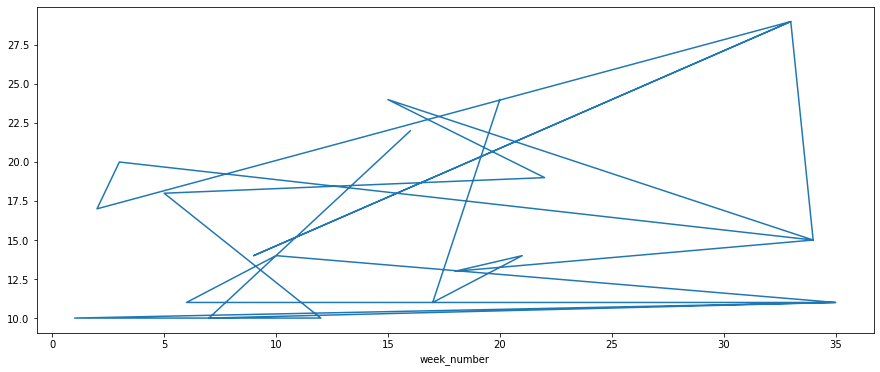

In [232]:
data1["total_claims"].plot(figsize=(15, 6))
plt.show()

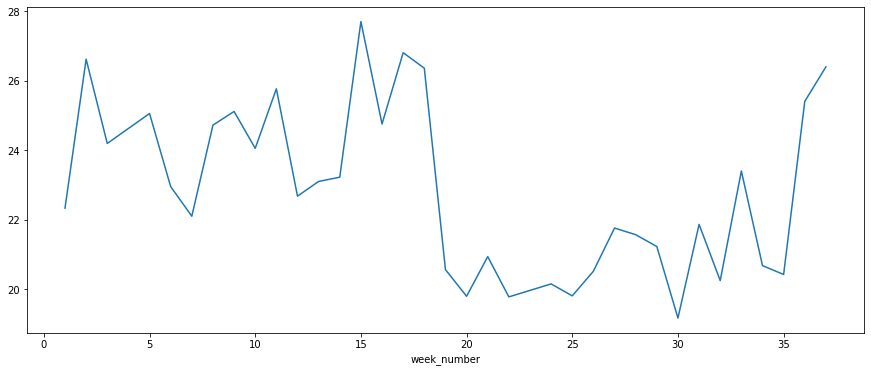

In [233]:
f1_df["total_claims"].plot(figsize=(15, 6))
plt.show()

In [234]:
lst = list(f_df['uu_id'].unique())
len(lst)

525

In [235]:
f2_df = f_df[f_df["uu_id"] == lst[0]]
f2_df["week_number"]

0        16
186       7
187      35
188      11
189       6
190      10
191      35
192       1
3976     12
7351      5
9957     22
11580    15
12322    34
12323     3
12324     2
12325    33
12326     9
12327    33
12328    34
14278    18
14279    21
14280    17
14281    20
Name: week_number, dtype: int64

In [236]:
f2_df = f_df[f_df["uu_id"] == lst[0]]
len(f2_df["week_number"])

23

In [237]:
f2_df = f_df[f_df["uu_id"] == lst[1]]
len(f2_df["week_number"])

41

In [238]:
f2_df = f_df[f_df["uu_id"] == lst[2]]
len(f2_df["week_number"])

27

In [239]:
f2_df = f_df[f_df["uu_id"] == lst[3]]
len(f2_df["week_number"])

41

In [240]:
f2_df = f_df[f_df["uu_id"] == lst[2]]
len(f2_df["week_number"])

27

data1 = f_df[f_df['uu_id'] == lst[0]]

In [241]:
data1 = f2_df.set_index('week_number')
data1.index

Int64Index([13, 12, 34, 15, 17,  7, 25, 11,  8, 10, 24, 34,  3,  1,  2, 31, 30,
             5, 20, 27,  6, 28, 21, 33, 33, 22, 19],
           dtype='int64', name='week_number')

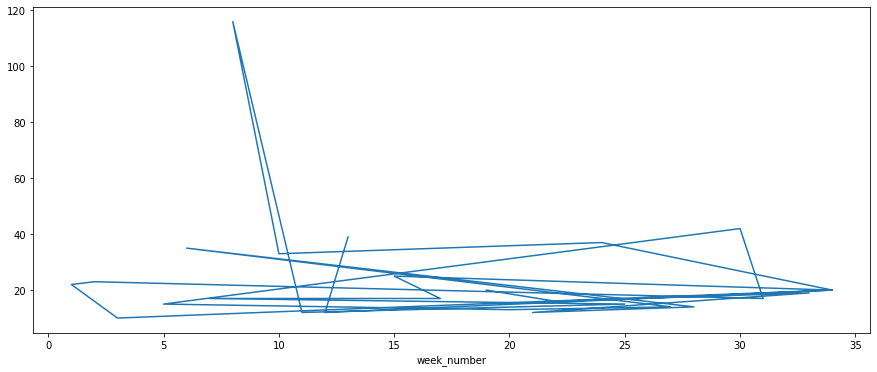

In [242]:
data1["total_claims"].plot(figsize=(15, 6))
plt.show()

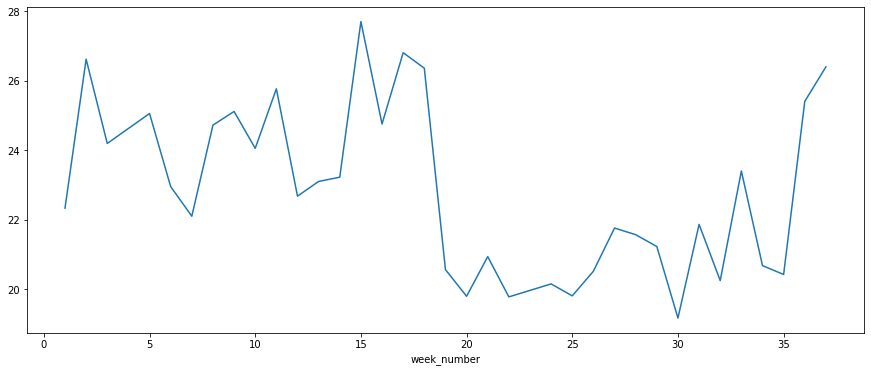

In [243]:
f1_df["total_claims"].plot(figsize=(15, 6))
plt.show()